In [160]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistan-2022-full-data/Pakistan-2022-full-data.dta


In [161]:
#Find pandas version
pd.__version__

'2.2.3'

In [319]:
# Remove display limit for better visibility
pd.options.display.max_columns = None
pd.options.display.max_rows = 30

In [163]:
df = pd.read_stata("/kaggle/input/pakistan-2022-full-data/Pakistan-2022-full-data.dta")
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,idstd,id,a4a,a6a,a2,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a12,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b1x,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,b8x,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c34bx,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a1a,d1a1x,d1a6a,d1a6b,d1a6c,d1a6cx,d1a3,d2,d2x,d2a1,d2a1x,n3,d3a,d3b,d3c,d31x,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d38x,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,h3x,h4x,PK16,h5,h6x,h7x,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,PK24kx,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g5bx,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata
0,1012049,1,Food,Medium,Islamabad,Panel,Food,Manufacturing,Islamabad,38,Medium,31,7,2022,15,12,90,int010,Urdu,Establishment,0,1,Yes,Yes,2.0,Yes,No,Yes,NaN,2021,6,30,Sole proprietorship,,100,Yes,100,0,0,0,No,NaN,1995,108,1995,7,No,No,,No,NaN,NaN,NaN,6000,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,2000,Gallons,,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,The establishment does not have an internet co...,NaN,NaN,NaN,NaN,With some difficulty,No obstacle,Manufacturing of,Manufacturing of flour from wheat,NaN,NaN,NaN,,100,150000000.0,one hundred fifty million,150000000.0,One hundred fifty million,140000000.0,100,0,0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No obstacle,No obstacle,Yes,No,Strongly agree,Strongly agree,We fixed it but did not take further action,Yes,1-2 production performance indicators,No,NaN,NaN,NaN,No,NaN,Does not apply (spontaneous),Rarely or never,National â main product sold mostly across t...,60.0,NaN,25.0,No,"Small or medium private firms, excluding this ...",No,No,No,No,No,No,Domestic private firms operating in the same p...,They avoid labor taxes or regulations,Regulations that restrict the establishmentâ...,No,"Yes, there is more competition",Prices set by HQ,No,NaN,Minor obstacle,No,NaN,,,NaN,No,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,No,NaN,Yes,100.0,106.0,Availability of skilled labor force,Access to markets,100,100,No,NaN,NaN,Does not apply (spontaneous),NaN,NaN,NaN,NaN,,No obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,No obstacle,Yes,80,0,0,20,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Columns: 434 entries, idstd to strata
dtypes: category(352), float32(3), float64(14), int16(7), int32(2), int8(40), object(16)
memory usage: 1.1+ MB


In [165]:
df.duplicated().sum()

0

In [166]:
df.describe()

,idstd,id,a6c,a14d,a14m,a14y,a14h,a14min,a1,competition_select,tax_select,a20y,a20m,a20d,b3,c15,c16,c17,d4,d5a,d10,d11,d14,d15a,f2,i1,h7a,j6,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,l9b1,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2b1,a15d,a15m,a15y,a15h,a15min,a19h,a19m,a13,d1a2_v4,d1a2,a4b,wstrict,wmedian,wweak,strata
count,1.300000e+03,1300.000000,1300.000000,1300.000000,1300.000000,1300.0,1300.000000,1300.000000,1300.0,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,847.000000,22.000000,18.000000,124.000000,123.000000,1300.000000,1027.000000,107.000000,106.000000,847.000000,1300.000000,1300.000000,50.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,356.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,4.530000e+02,1300.000000,1300.000000,1300.0,1300.000000,1300.000000,198.000000,198.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.012698e+06,16529.560769,104.034615,15.898462,8.592308,2022.0,13.133846,28.590000,90.0,0.512308,0.500769,2021.273846,7.715385,30.313846,81.554615,1.074380,11.727273,10.388889,15.870968,-2.349593,-1.464615,0.381694,17.953271,-2.066038,91.081464,1.615385,1.496923,-0.780000,3.517692,3.716154,3.621538,3.630769,3.456923,3.056923,24.525281,8.495385,8.57000,8.223846,8.174615,8.362308,8.260769,8.546154,8.607692,8.745385,8.953846,8.246923,7.726923,7.050000,6.576154,5.460000,3.240843e+06,15.945385,8.622308,2022.0,14.123846,30.889231,1.474747,17.994949,1.919231,3009.889231,3382.074615,33.495385,88.466347,88.477310,88.483330,91.297692
std,3.754220e+02,15215.744168,333.481940,8.777490,2.236227,0.0,2.972638,17.513274,0.0,0.500041,0.500192,0.451250,2.791537,0.464233,27.616547,2.711571,11.909107,13.434542,20.730939,4.981908,2.924423,3.013675,19.704603,4.955553,35.335029,0.700650,2.999742,8.229588,1.666727,1.572537,1.639062,1.727549,1.779316,1.774377,95.186973,4.377753,4.41624,4.396256,4.456907,4.442460,4.435198,4.291014,4.041159,4.085567,4.069189,4.421389,4.408688,4.358965,4.026229,2.872304,1.239792e+07,8.780057,2.226157,0.0,3.462664,17.690132,0.975262,18.280804,0.920437,1582.711802,1527.221207,15.286864,118.424423,118.455208,118.499359,68.585061
min,1.012049e+06,1.000000,2.000000,1.000000,5.000000,2022.0,0.000000,0.000000,90.0,0.000000,0.000000,2020.000000,1.000000,30.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000e+00,1.000000,5.000000,2022.0,0.000000,0.000000,0.000000,0.000000,1.000000,1010.000000,1511.000000,15.000000,1.000000,1.000000,1.000000,1.000000
25%,1.012374e+06,706.750000,12.000000,7.000000,7.000000,2022.0,11.000000,13.000000,90.0,0.000000,0.000000,2021.000000,6.000000,30.000000,60.000000,2.000000,5.000000,2.000000,5.000000,-8.000000,0.000000,0.000000,5.000000,-8.000000,72.000000,1.000000,2.000000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,4.000000,4.000000,5.00000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.200000e+05,8.000000,7.000000,2022.0,12.000000,15.000000,1.000000,1.000000,1.000000,1430.000000,1810.000000,18.000000,7.214286,7.214286,7.214286,29.000000
50%,1.012698e+06,18367.000000,27.500000,18.000000,8.000000,2022.0,13.000000,28.000000,90.0,1.000000,1.000000,2021.000000,6.000000,30.000000,100.0

The exports below are done to allow exploring the dataset in different tools that dont accept .dta extension and also to enable me create a data dictionary and perform column section using google sheets.

In [167]:
# Create CSV containing column names and their types or nature as interpreted by pandas
df.dtypes.to_csv(path_or_buf="/kaggle/working/Pakistan_2022_full_data_columns.csv",header=["Type"],index_label="Name")

In [168]:
# Create CSV file 
df.to_csv(path_or_buf="/kaggle/working/Pakistan_2022_full_data.csv")

## Functions

Here below in this section I will group any function that I will use later in the notebook.

In [169]:
def find_outliers_iqr(df, column):
    # Step 1: Work only with non-NaN values
    col_data = df[column].dropna()

    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 2: Compute outlier mask only on valid (non-NaN) values
    outlier_mask = (col_data < lower_bound) | (col_data > upper_bound)

    # Step 3: Get index of outliers
    outlier_indices = col_data[outlier_mask].index

    # Step 4: Select full rows from original df using those indices
    outliers = df.loc[outlier_indices]

    # Step 5: Percent of outliers from valid observations only
    total_valid = col_data.shape[0]
    percent = (len(outlier_indices) / total_valid) * 100 if total_valid > 0 else 0

    return outliers, lower_bound, upper_bound, percent

In [170]:
#drop ID columns
df1 = df.drop(columns=['idstd','id'])


In [171]:
# drop free text columns and screener number
list_obj_col = []
for col in df1.columns:
    if df1[col].dtype =='object':
        list_obj_col.append(col)
df1 = df1.drop(columns=list_obj_col)

In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Columns: 416 entries, a4a to strata
dtypes: category(352), float32(3), float64(14), int16(7), int8(40)
memory usage: 993.6 KB


## EDA

## Variables inspection

In [173]:
#explore df1 column values
for col in df1.columns:
   print('**',col,'**')
   print(df1[col].info())
   print('------------------------------------')
   print(df1[col].describe())
   print('------------------------------------')
   print(df1[col].value_counts(normalize=True)*100)
   print('####################################')

** a4a **
<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: a4a
Non-Null Count  Dtype   
--------------  -----   
1300 non-null   category
dtypes: category(1)
memory usage: 1.8 KB
None
------------------------------------
count                    1300
unique                     10
top       Other Manufacturing
freq                      199
Name: a4a, dtype: object
------------------------------------
a4a
Other Manufacturing                  15.307692
Retail                                9.846154
Food                                  9.692308
Non-Metallic Mineral Products         9.538462
Hotels & Restaurants                  9.461538
Textiles                              9.230769
Garments                              9.230769
Chemicals & Chemical Products         9.230769
Motor Vehicles & Transport Equip.     9.230769
Other Services                        9.230769
Name: proportion, dtype: float64
####################################
** a6a **
<class 

In [174]:
 Distribution plots
for col in df1.columns:
    #execute only if the column contains valid values
    if df1[col].notna().sum() > 0 and df1[col].nunique() > 0:
        plt.figure(figsize=(15, 10))
        if df1[col].dtype == 'category':
            sns.countplot(data=df1, y=col)
            plt.title('Count plot: '+col, fontsize=18)
       else:
            sns.boxplot(data=df1, x=col)
            plt.title('Box plot: '+col, fontsize=18)
        plt.show()
    else:
        print(f"Skipping {col} — no valid data to plot.")

In [175]:
# columns with null
print("Columns with nulls")
columns_with_nulls_list = []
for col in df1.columns:
    if df1[col].isna().sum() > 0:
        columns_with_nulls_list.append(col)
        print(col,' : count =', df1[col].isna().sum(),'; percent = ',round(100* (df1[col].isna().sum()/len(df1[col])),2))

Columns with nulls
a7a  : count = 1017 ; percent =  78.23
a7b  : count = 1017 ; percent =  78.23
a11  : count = 1123 ; percent =  86.38
a7c  : count = 1123 ; percent =  86.38
a9  : count = 1194 ; percent =  91.85
b4a  : count = 1229 ; percent =  94.54
c4  : count = 1260 ; percent =  96.92
c5  : count = 1260 ; percent =  96.92
c31  : count = 1260 ; percent =  96.92
c7  : count = 706 ; percent =  54.31
c8a  : count = 712 ; percent =  54.77
c8b  : count = 712 ; percent =  54.77
c9a  : count = 861 ; percent =  66.23
c9b  : count = 1145 ; percent =  88.08
c11  : count = 722 ; percent =  55.54
PK1  : count = 722 ; percent =  55.54
PK3  : count = 1241 ; percent =  95.46
PK4  : count = 1241 ; percent =  95.46
c13  : count = 1283 ; percent =  98.69
c14  : count = 1283 ; percent =  98.69
c33  : count = 1283 ; percent =  98.69
c34b  : count = 119 ; percent =  9.15
c15  : count = 453 ; percent =  34.85
c152  : count = 847 ; percent =  65.15
c16  : count = 1278 ; percent =  98.31
c162  : count = 12

In [176]:
# columns with outliers
outliers_dict={}
print("Columns with outliers")
for col in df1.columns:
    if df1[col].dtype != 'category':
        outliers, lower_bound, upper_bound, percent = find_outliers_iqr(df1, col)
        if percent > 0:
            print(col, " : percent = ",round(percent,2))
            outliers_dict[col] = percent


Columns with outliers
a6c  : percent =  9.62
a14h  : percent =  1.31
b3  : percent =  2.23
c15  : percent =  12.51
c17  : percent =  5.56
d4  : percent =  22.58
d10  : percent =  21.92
d11  : percent =  13.05
d14  : percent =  1.87
f2  : percent =  0.83
i1  : percent =  0.23
h7a  : percent =  9.69
j6  : percent =  28.0
l9b1  : percent =  11.8
n2b1  : percent =  10.82
a15h  : percent =  2.46
a19h  : percent =  3.03
wstrict  : percent =  2.85
wmedian  : percent =  2.92
wweak  : percent =  2.92


### **1. Business sector and activity: `a4a` - Industry Sampling Sector, `a4b_v4` - Industry Screener Sector, `d1a1a`  - Main Product/Service (By The Largest % of Annual Sales) In Last Fiscal Year)**

In [177]:
df1["a4a"].value_counts()

a4a
Other Manufacturing                  199
Retail                               128
Food                                 126
Non-Metallic Mineral Products        124
Hotels & Restaurants                 123
Textiles                             120
Garments                             120
Chemicals & Chemical Products        120
Motor Vehicles & Transport Equip.    120
Other Services                       120
Name: count, dtype: int64

In [178]:
df1["a4a"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: a4a
Non-Null Count  Dtype   
--------------  -----   
1300 non-null   category
dtypes: category(1)
memory usage: 1.8 KB


In [179]:
df1["a4b_v4"].value_counts()

a4b_v4
Retail                                                     191
Textiles                                                   138
Non-metallic mineral products                              115
Food                                                       114
Food and beverage                                           93
Chemical and chemical products                              93
Other manufacturing                                         84
Wearing apparel                                             83
Accommodation                                               46
Wholesale                                                   41
Other transport equipment                                   37
Machinery and equipment                                     30
Services of motor vehicles                                  27
Construction (Section F: (41-43))                           23
Pharmaceutical products                                     22
Furniture                                       

In [180]:
df1["a4b_v4"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: a4b_v4
Non-Null Count  Dtype   
--------------  -----   
1300 non-null   category
dtypes: category(1)
memory usage: 2.7 KB


In [181]:
df1["d1a1a"].value_counts()

d1a1a
Manufacturing of        847
Retail trade of         197
Restaurant               90
Wholesale trade of       49
Hotel                    47
Provide services of      41
Construction of          29
Name: count, dtype: int64

In [182]:
df1["d1a1a"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: d1a1a
Non-Null Count  Dtype   
--------------  -----   
1300 non-null   category
dtypes: category(1)
memory usage: 1.7 KB


Multiple variables tackle the industry and main activity of the establishment. Which columns to include and which to exclude among `a4a`,`a4b_v4`&`d1a1a`. To get more information I will display them in a heirarical representation to understand more how these variables are related.

In [183]:
grouped = df1.groupby(["a4a","a4b_v4","d1a1a"],observed=True).agg({"b1":"count"})
grouped

b1
a4a                               a4b_v4                                             d1a1a                    
Food                              Food                                               Manufacturing of       96
                                  Beverages                                          Manufacturing of        1
                                  Textiles                                           Manufacturing of        3
                                  Pharmaceutical products                            Manufacturing of        1
                                  Other manufacturing                                Manufacturing of        1
                                  Wholesale                                          Wholesale trade of      1
                                  Retail                                             Retail trade of         5
                                  Transportation, Storage, and Postal (Section H ... Provide services of     1
                                  Accommodation                                      Hotel                   1
                                                                                     Restaurant              1
                                  Food and beverage                                  Provide services of     1
                                                                                     Restaurant             14
Textiles                          Food                                               Manufacturing of        3
                                  Tobacco products                                   Manufacturing of        1
                                  Textiles                                           Manufacturing of       81
                                  Wearing apparel                                    Manufacturing of       17
                                  Leather and related products                       Manufacturing of        1
                                  Paper and paper products                           Manufacturing of        1
                                  Rubber and plastic products                        Manufacturing of        1
                                  Fabricated metal products                          Manufacturing of        1
                                  Electrical equipment                               Manufacturing of        1
                                  Other manufacturing                                Manufacturing of        1
                                  Wholesale                                          Wholesale trade of      3
                                  Retail                                             Retail trade of         9
Garments                          Food                                               Manufacturing of        1
                                  Textiles                                           Manufacturing of       48
                                  Wearing apparel                                    Manufacturing of       48
                                  Leather and related products                       Manufacturing of        7
                                  Pharmaceutical products                            Manufacturing of        2
                                  Non-metallic mineral products                      Manufacturing of        2
                                  Electrical equipment                               Manufacturing of        1
                                  Machinery and equipment                            Manufacturing of        1
                                  Other manufacturing                                Manufacturing of        5
                                  Retail                                             Retail trade of         4
                                  Transportation, Storage, and Postal (Section H ... Provide services of     1
C

From the result I will exclude `a4a` because it is very broad and at times not indicative & `d1a1x` because it's very detailed and free input meaning the same activity is writen in numerous ways which make it hard to summarize.
Also,noted that `a4b_v4` contain numerical values 42 and 43.

In [184]:
df1[(df1["a4b_v4"]==42)  |  (df1["a4b_v4"]==43)][["a4a","a4b_v4","d1a1a"]]

,a4a,a4b_v4,d1a1a
462,Other Services,42,Construction of
631,Other Services,42,Construction of
650,Other Services,43,Construction of
651,Other Services,42,Construction of
673,Other Services,43,Construction of
674,Other Services,42,Construction of
1136,Motor Vehicles & Transport Equip.,42,Provide services of


As Section F: Construction
	•	41: Construction of buildings
	•	42: Civil engineering
	•	43: Specialized construction activities
Therefor 42 and 43 should be replaced by "Construction (Section F: (41-43))" except for record 1136 which is not concerned with construction but with "Services of motor vehicles" so it should be replaced as such.

Final element, From Pakistan_2022_ES_Implementation_Report.pdf I quote "The variable d1a2_v4 denotes the main activity of the establishment, as obtained during the WBES interview, coded in the four-digit ISIC Rev. 4. Users should note that this activity may differ from the industry
classification given in the Sampling Frame, a4a. Users are generally advised to use industry categories based on the realized information in d1a2_v4." So according to this advise I will keep only a4b_v4.

In [185]:
# Change value of a4b_v4 in row 1136 to "Services of motor vehicles"
df1.loc[1136,"a4b_v4"]= "Services of motor vehicles"
df1.loc[1136,["a4a","a4b_v4","d1a1a"]]

a4a       Motor Vehicles & Transport Equip.
a4b_v4           Services of motor vehicles
d1a1a                  Provide services of 
Name: 1136, dtype: object

In [186]:
# Replace 42 and 43 in the rest of the rows by 'Construction (Section F: (41-43))'
df1['a4b_v4'] = df1['a4b_v4'].astype(str)
df1.loc[df1['a4b_v4'].isin(['42', '43']), 'a4b_v4'] = 'Construction (Section F: (41-43))'
df1['a4b_v4'] = df1['a4b_v4'].astype('category')
df1[ 'a4b_v4'].value_counts()

a4b_v4
Retail                                                     191
Textiles                                                   138
Non-metallic mineral products                              115
Food                                                       114
Chemical and chemical products                              93
Food and beverage                                           93
Other manufacturing                                         84
Wearing apparel                                             83
Accommodation                                               46
Wholesale                                                   41
Other transport equipment                                   37
Machinery and equipment                                     30
Construction (Section F: (41-43))                           29
Services of motor vehicles                                  28
Pharmaceutical products                                     22
Furniture                                       

In [187]:
order= df1["a4b_v4"].value_counts()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


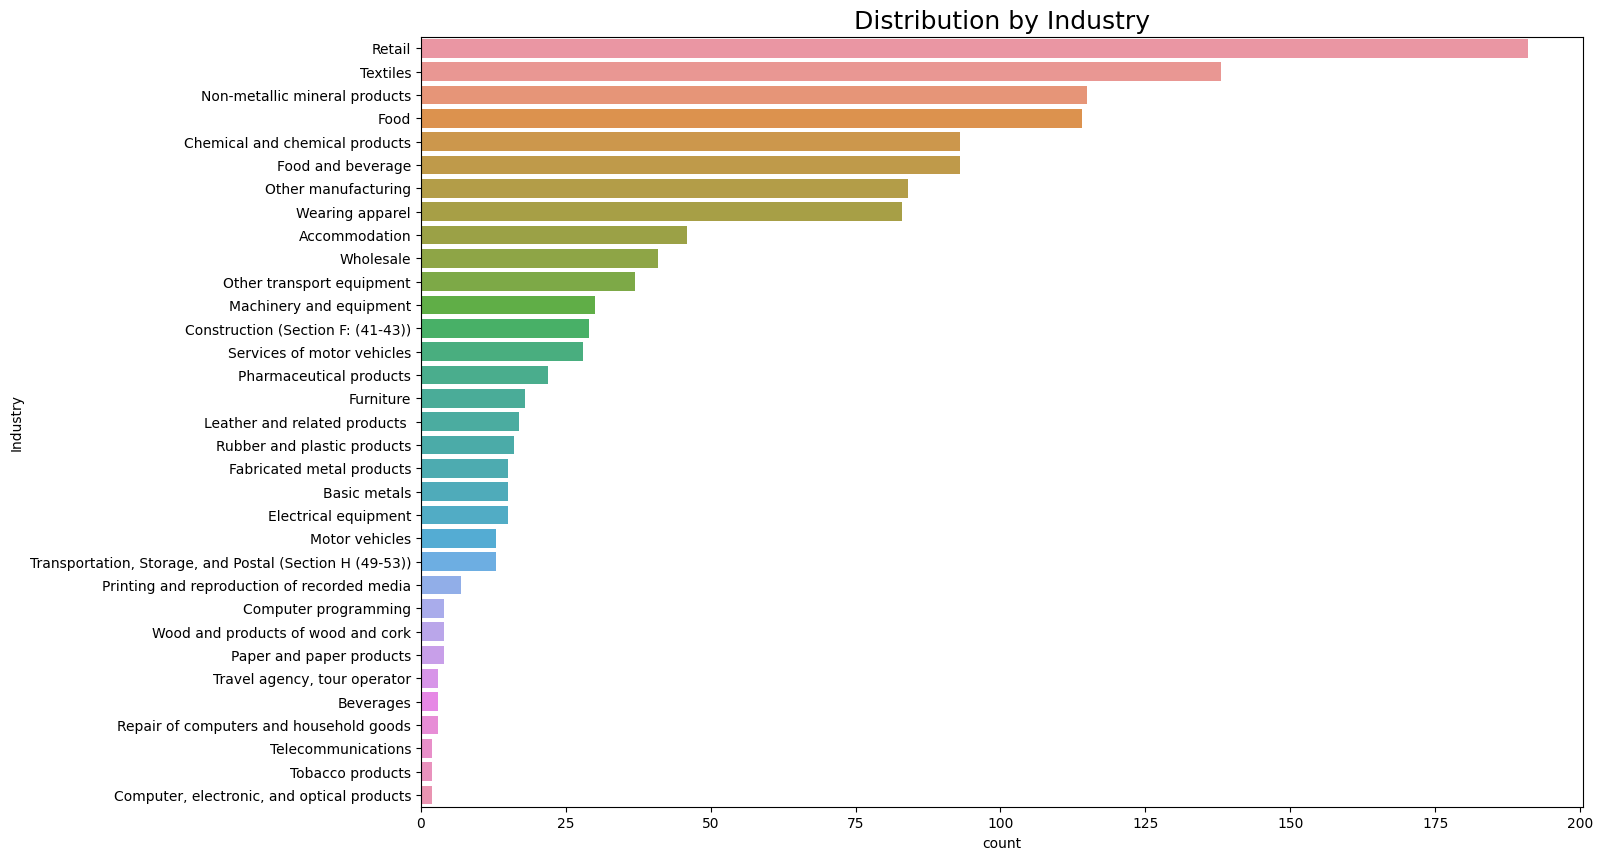

In [188]:
plt.figure(figsize=(15,10))
sns.countplot(df1,y='a4b_v4',order=order.index)
plt.title('Distribution by Industry',fontsize=18)
plt.ylabel("Industry")
plt.xlabel("count")
plt.show()

Categories "Food" and "Beverage" need to be merged with "food and beverage" to get the food and beverage and beverage 

In [189]:
# Replace food and beverage in the rest of the rows by 'Food and beverage'
df1['a4b_v4'] = df1['a4b_v4'].astype(str)
df1.loc[df1['a4b_v4'].isin(['Beverages', 'Food']), 'a4b_v4'] = 'Food and beverage'
df1['a4b_v4'] = df1['a4b_v4'].astype('category')
df1['a4b_v4'].value_counts(normalize=True)*100

a4b_v4
Food and beverage                                          16.153846
Retail                                                     14.692308
Textiles                                                   10.615385
Non-metallic mineral products                               8.846154
Chemical and chemical products                              7.153846
Other manufacturing                                         6.461538
Wearing apparel                                             6.384615
Accommodation                                               3.538462
Wholesale                                                   3.153846
Other transport equipment                                   2.846154
Machinery and equipment                                     2.307692
Construction (Section F: (41-43))                           2.230769
Services of motor vehicles                                  2.153846
Pharmaceutical products                                     1.692308
Furniture                  

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


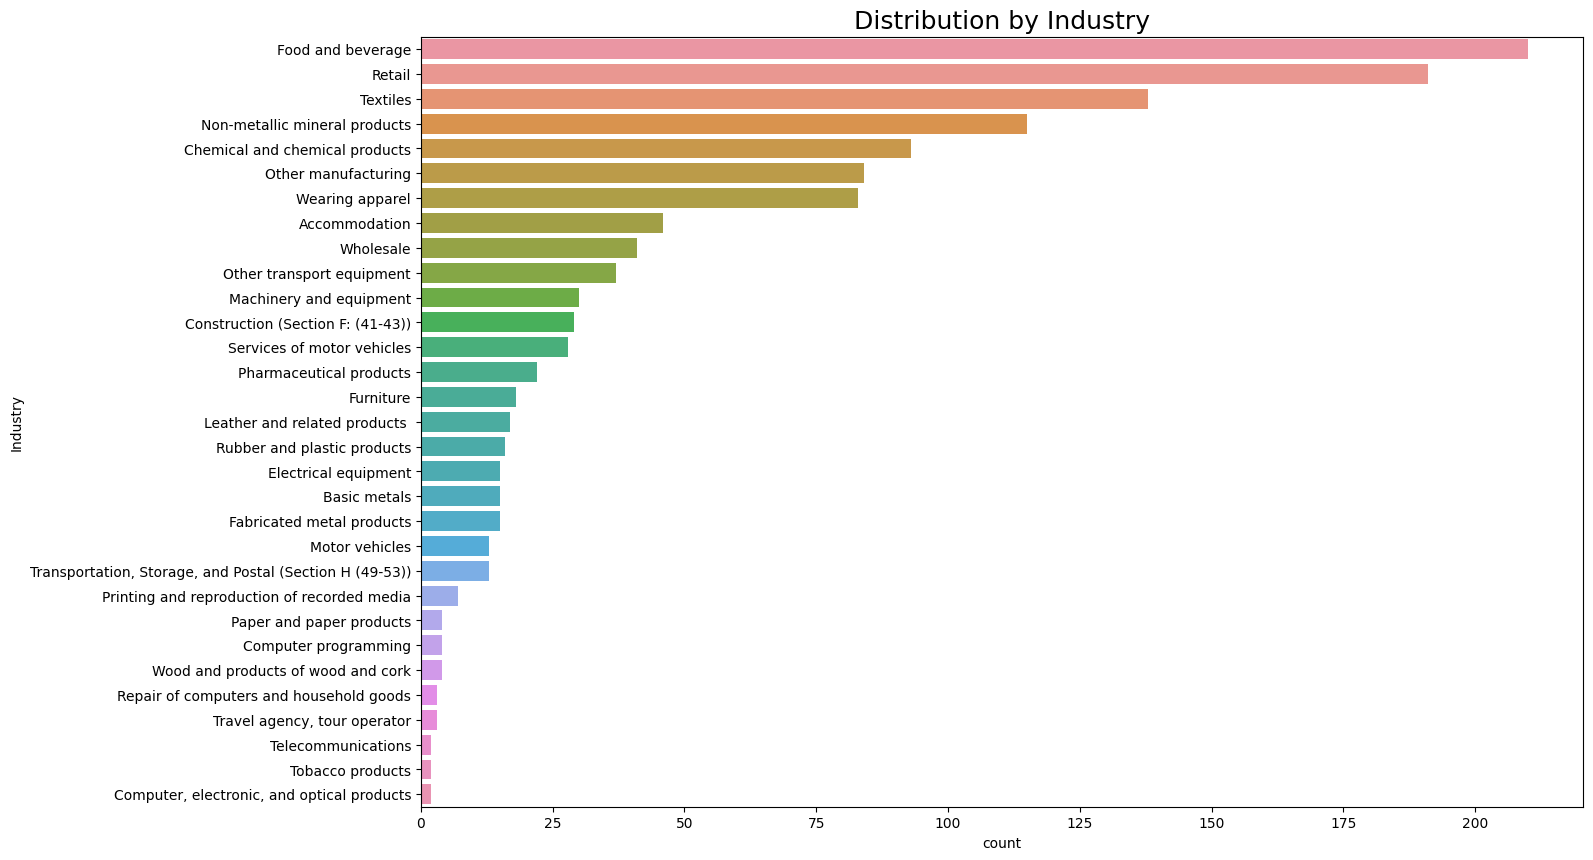

In [190]:
order= df1["a4b_v4"].value_counts()

plt.figure(figsize=(15,10))
sns.countplot(df1,y='a4b_v4',order=order.index)
plt.title('Distribution by Industry',fontsize=18)
plt.ylabel("Industry")
plt.xlabel("count")
plt.show()

**What we can conclude:**
The top 3 industries represented in order are: Food and beverage (16.2%); Retail (14.7%); Textiles (10.6%).

In [191]:
df1= df1.drop(columns=["a4a","d1a1a"])
df1.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,a2,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata
0,Medium,Islamabad,Panel,Food and beverage,Manufacturing,Islamabad,38,Medium,31,7,2022,15,12,90,Urdu,Establishment,0,1,Yes,Yes,2.0,Yes,No,Yes,NaN,2021,6,30,Sole proprietorship,100,Yes,100,0,0,0,No,NaN,1995,108,1995,7,No,No,No,NaN,NaN,NaN,6000,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,2000,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,The establishment does not have an internet co...,NaN,NaN,NaN,NaN,With some difficulty,No obstacle,NaN,NaN,NaN,100,150000000.0,150000000.0,140000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No obstacle,No obstacle,Yes,No,Strongly agree,Strongly agree,We fixed it but did not take further action,Yes,1-2 production performance indicators,No,NaN,NaN,NaN,No,NaN,Does not apply (spontaneous),Rarely or never,National â main product sold mostly across t...,60.0,NaN,25.0,No,"Small or medium private firms, excluding this ...",No,No,No,No,No,No,Domestic private firms operating in the same p...,They avoid labor taxes or regulations,Regulations that restrict the establishmentâ...,No,"Yes, there is more competition",Prices set by HQ,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,100.0,106.0,Availability of skilled labor force,Access to markets,100,100,No,NaN,NaN,Does not apply (spontaneous),NaN,NaN,NaN,NaN,No obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,No obstacle,Yes,80,0,0,20,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,No need for a loan - establishment had suffici...,No need for a loan - establishment had enough ...,NaN,NaN,NaN,Yes,0,NaN,NaN,NaN,NaN

### **2. Region: a2 - Sampling Region & a3a - Region of The Establishment**

In [192]:
df1["a2"].value_counts()

a2
Punjab                565
Sindh                 256
Khyber-Pakhtunkhwa    180
Balochistan           153
Islamabad             146
Name: count, dtype: int64

In [193]:
df1["a2"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: a2
Non-Null Count  Dtype   
--------------  -----   
1300 non-null   category
dtypes: category(1)
memory usage: 1.6 KB


In [194]:
df1["a3a"].value_counts()

a3a
Punjab                562
Sindh                 255
Khyber-Pakhtunkhwa    181
Balochistan           153
Islamabad             149
Name: count, dtype: int64

In [195]:
df1["a3a"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: a3a
Non-Null Count  Dtype   
--------------  -----   
1300 non-null   category
dtypes: category(1)
memory usage: 1.6 KB


In [196]:
# display records whose Sector Region is not similar to Sampling Region
diff_region = df1[df1["a2"]!= df1["a3a"]]
diff_region

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,a2,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata
14,Medium,Sindh,Panel,Food and beverage,Other services,Punjab,30,Medium,12,10,2022,14,12,90,Urdu,Establishment,1,0,Yes,No,NaN,NaN,NaN,NaN,NaN,2021,6,30,Sole proprietorship,100,No,100,0,0,0,No,NaN,1995,20,1995,12,No,Yes,No,NaN,NaN,NaN,5500,Yes,30.0,2.0,0.0,5.0,NaN,Yes,10.0,1800000.0,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,1200,Cubic feet,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,15.0,20000.0,Yes,8.0,NaN,NaN,Don't know (spontaneous),With little difficulty,Major obstacle,NaN,NaN,NaN,100,1.800000e+08,80000000.0,160000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate obstacle,Major obstacle,Yes,Yes,Tend to disagree,Tend to agree,No action was taken,Yes,1-2 production performance indicators,No,NaN,NaN,NaN,Yes,Their own performance,Non-managers are normally not promoted,After 6 months of identifying non-manager unde...,Local â main product sold mostly in same mun...,Too many to count,Between 50% and 90%,NaN,No,"Small or medium private firms, excluding this ...",No,No,No,No,Yes,No,Domestic private firms operating in the same p...,They do not pay import duties or observe trade...,Regulations that restrict the establishmentâ...,Yes,"Yes, there is more competition",No,Yes,Negatively,Moderate obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,Cost of land / buildings,Infrastructure quality,0,0,No,NaN,NaN,No,NaN,NaN,NaN,NaN,Moderate obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,Moderate obstacle,No,100,0,0,0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,Application procedures were complex,Application procedures were complex,NaN,NaN

In [197]:
diff_region.shape

(20, 414)

Not clear which region should be considered 🤔.However, according to what I collected of information `a2`is the etablishment registeration region while a3a is the etablishment operation region. So I will keep `a3a` as it shows the physical location of the establishment.

In [198]:
df1.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,a2,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata
0,Medium,Islamabad,Panel,Food and beverage,Manufacturing,Islamabad,38,Medium,31,7,2022,15,12,90,Urdu,Establishment,0,1,Yes,Yes,2.0,Yes,No,Yes,NaN,2021,6,30,Sole proprietorship,100,Yes,100,0,0,0,No,NaN,1995,108,1995,7,No,No,No,NaN,NaN,NaN,6000,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,2000,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,The establishment does not have an internet co...,NaN,NaN,NaN,NaN,With some difficulty,No obstacle,NaN,NaN,NaN,100,150000000.0,150000000.0,140000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No obstacle,No obstacle,Yes,No,Strongly agree,Strongly agree,We fixed it but did not take further action,Yes,1-2 production performance indicators,No,NaN,NaN,NaN,No,NaN,Does not apply (spontaneous),Rarely or never,National â main product sold mostly across t...,60.0,NaN,25.0,No,"Small or medium private firms, excluding this ...",No,No,No,No,No,No,Domestic private firms operating in the same p...,They avoid labor taxes or regulations,Regulations that restrict the establishmentâ...,No,"Yes, there is more competition",Prices set by HQ,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,100.0,106.0,Availability of skilled labor force,Access to markets,100,100,No,NaN,NaN,Does not apply (spontaneous),NaN,NaN,NaN,NaN,No obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,No obstacle,Yes,80,0,0,20,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,No need for a loan - establishment had suffici...,No need for a loan - establishment had enough ...,NaN,NaN,NaN,Yes,0,NaN,NaN,NaN,NaN

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


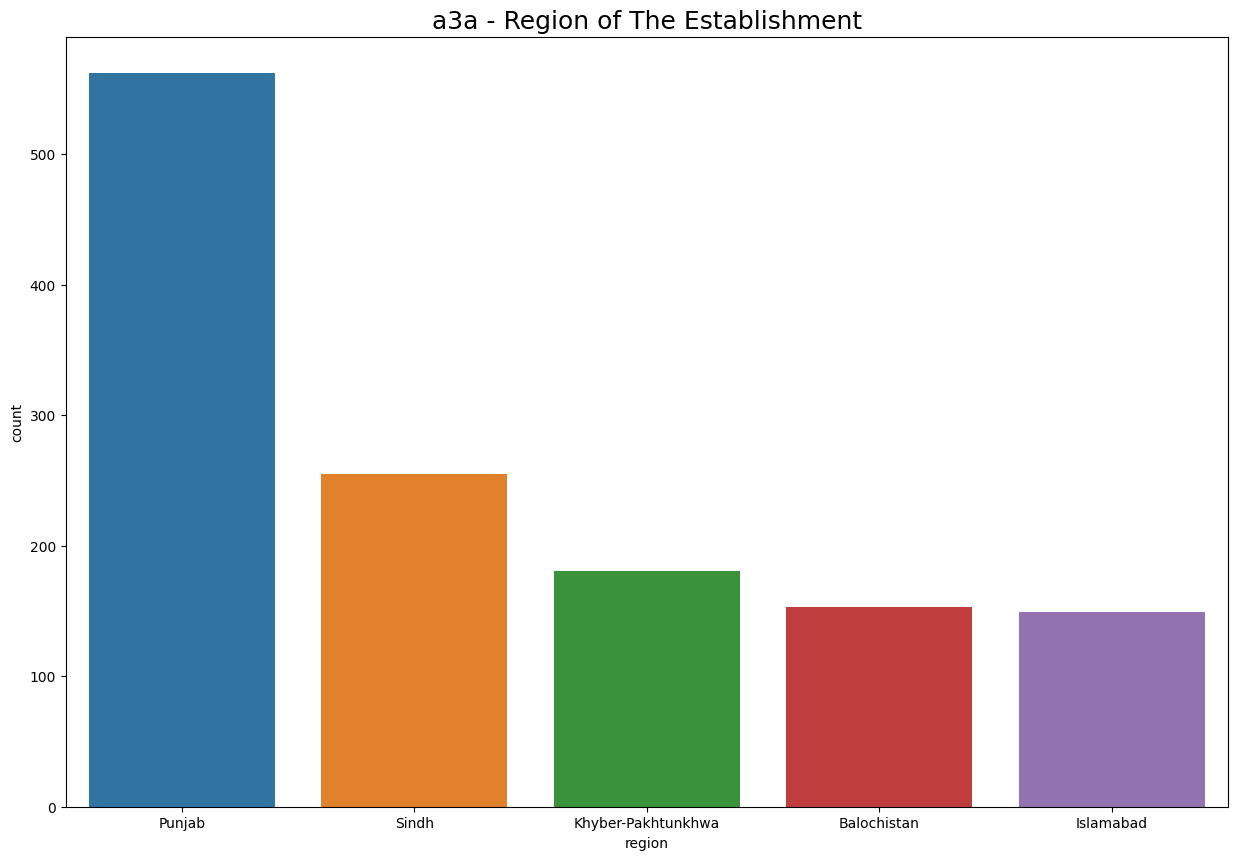

In [199]:
plt.figure(figsize=(15,10))
sns.countplot(df1,x='a3a')
plt.title('a3a - Region of The Establishment',fontsize=18)
plt.ylabel("count")
plt.xlabel("region")
plt.show()

In [200]:
#drop a2
df1= df1.drop(columns=["a2"])
df1.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata
0,Medium,Panel,Food and beverage,Manufacturing,Islamabad,38,Medium,31,7,2022,15,12,90,Urdu,Establishment,0,1,Yes,Yes,2.0,Yes,No,Yes,NaN,2021,6,30,Sole proprietorship,100,Yes,100,0,0,0,No,NaN,1995,108,1995,7,No,No,No,NaN,NaN,NaN,6000,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,2000,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,The establishment does not have an internet co...,NaN,NaN,NaN,NaN,With some difficulty,No obstacle,NaN,NaN,NaN,100,150000000.0,150000000.0,140000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No obstacle,No obstacle,Yes,No,Strongly agree,Strongly agree,We fixed it but did not take further action,Yes,1-2 production performance indicators,No,NaN,NaN,NaN,No,NaN,Does not apply (spontaneous),Rarely or never,National â main product sold mostly across t...,60.0,NaN,25.0,No,"Small or medium private firms, excluding this ...",No,No,No,No,No,No,Domestic private firms operating in the same p...,They avoid labor taxes or regulations,Regulations that restrict the establishmentâ...,No,"Yes, there is more competition",Prices set by HQ,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,100.0,106.0,Availability of skilled labor force,Access to markets,100,100,No,NaN,NaN,Does not apply (spontaneous),NaN,NaN,NaN,NaN,No obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,No obstacle,Yes,80,0,0,20,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,No need for a loan - establishment had suffici...,No need for a loan - establishment had enough ...,NaN,NaN,NaN,Yes,0,NaN,NaN,NaN,NaN,0,NaN,NaN,No

### **3. Firm structure: a7 - Establishment part of a multi-establishment Firm? & a7a - Number of Establishments In The Firm**

In [201]:
df1["a7"].value_counts(normalize=True)*100

a7
No     78.230769
Yes    21.769231
Name: proportion, dtype: float64

In [202]:
mask = df1["a7"] == "No"
df1[mask]["a7a"].isna().sum()

1017

For each Firm that consists of one estblishment (`a7`== 'No') the number of Establishments in the Firm (`a7a`) should be set to 1.
Also "Don't know (spontaneous)" should be replaced by a numerical value.

In [203]:
# Add '1' as a new category if it's not already there
if 1 not in df1['a7a'].cat.categories:
    df1['a7a'] = df1['a7a'].cat.add_categories(["1.0"])

# Replace NaN with 1 where a7 == "No"
df1.loc[(df1['a7'] == "No") & (df1['a7a'].isna()), 'a7a'] = "1.0"
df1[["a7","a7a"]].head()

,a7,a7a
0,Yes,2.0
1,Yes,35.0
2,Yes,80.0
3,No,1.0
4,No,1.0


In [204]:
#check if there is still null
df1["a7a"].isna().sum()

0

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


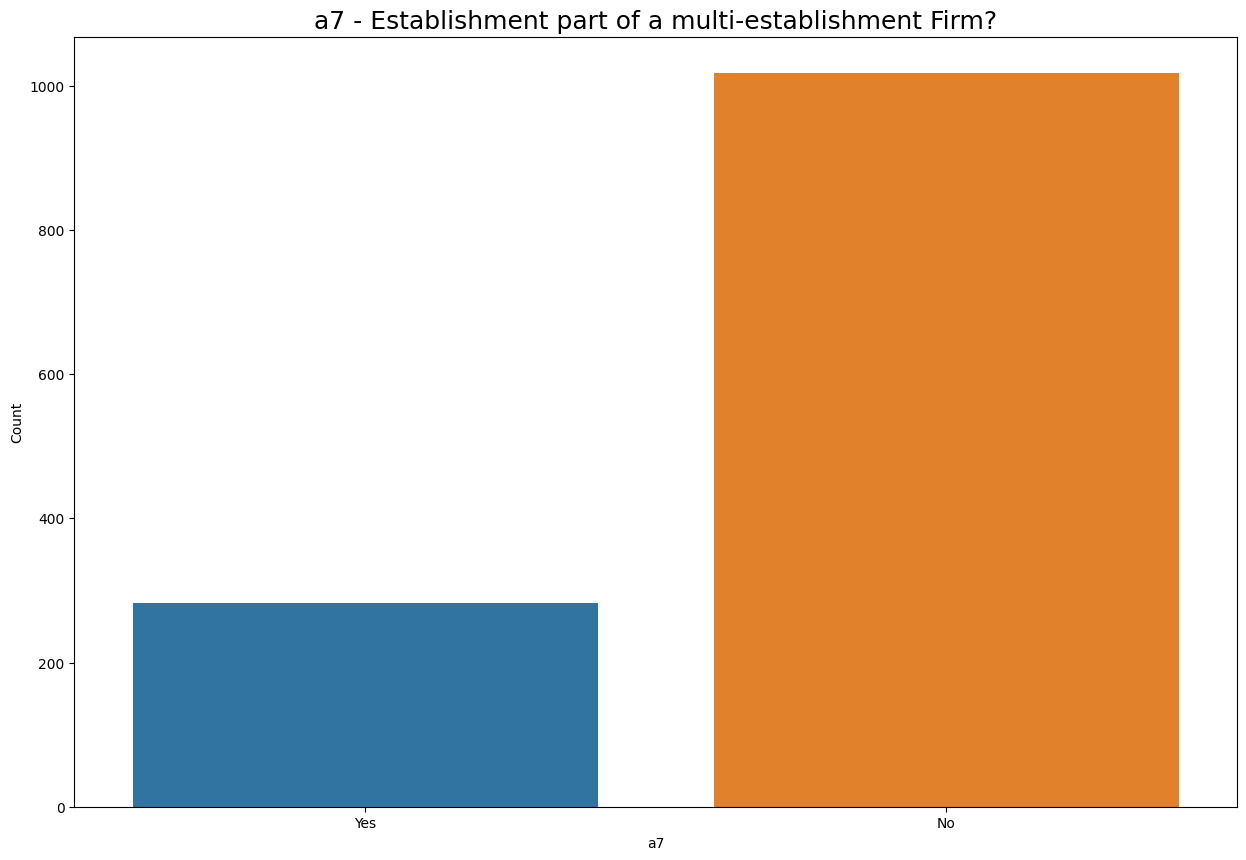

In [205]:
plt.figure(figsize=(15,10))
sns.countplot(df1,x='a7')
plt.title('a7 - Establishment part of a multi-establishment Firm?',fontsize=18)
plt.ylabel("Count")
plt.show()

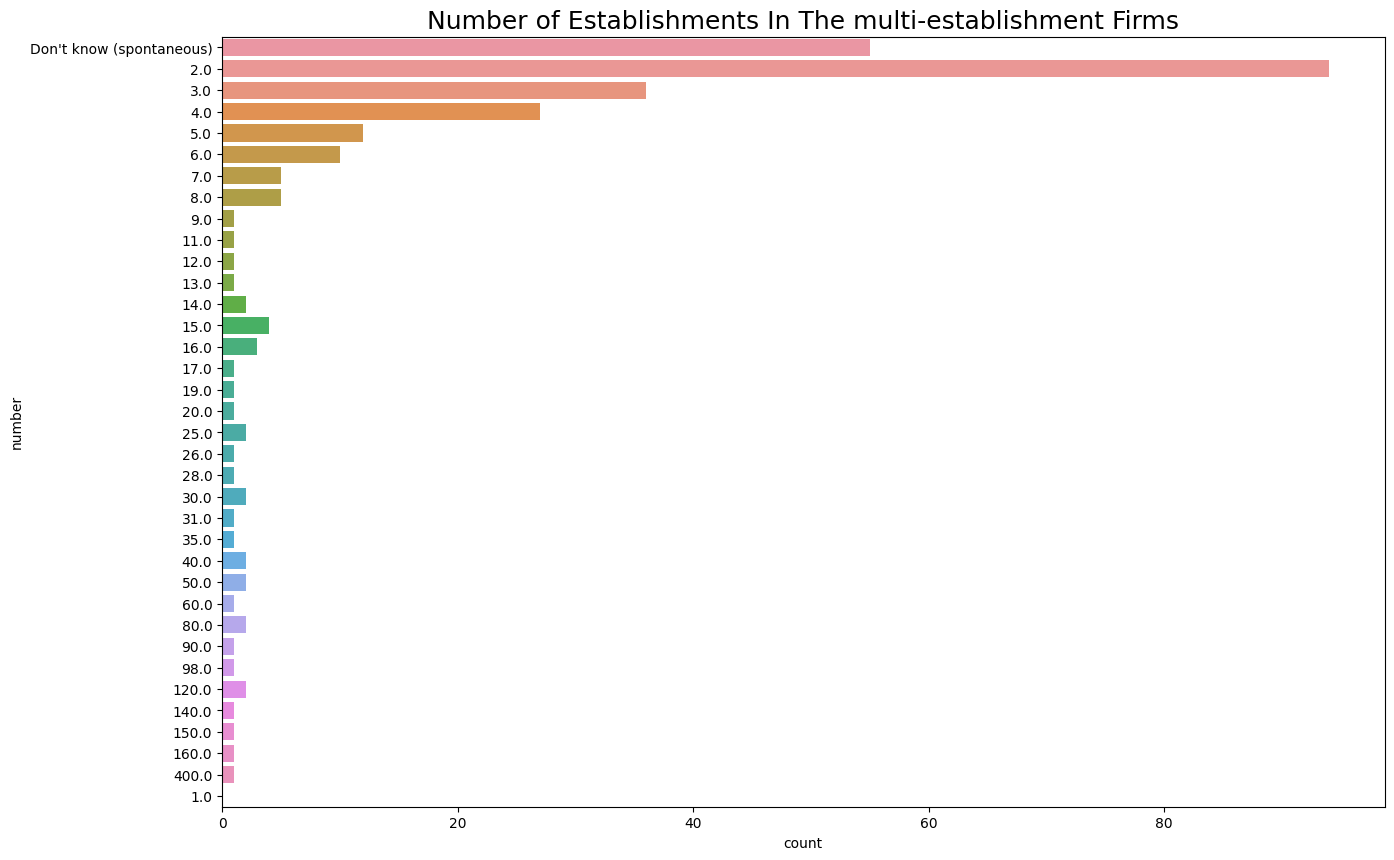

In [206]:

df_multi = df1[df1['a7']!="No"]

plt.figure(figsize=(15,10))
sns.countplot(df_multi,y='a7a')
plt.title('Number of Establishments In The multi-establishment Firms',fontsize=18)
plt.ylabel("number")
plt.show()

In [207]:
# calculate the percent of non response 
df1[(df1['a7a']=="Don't know (spontaneous)") & (df1['a7']=="Yes")]['a7a'].count()/(df1['a7']=="Yes").sum()*100

19.434628975265017

In [208]:
df1[(df1['a7a']!="Don't know (spontaneous)") & (df1['a7']=="Yes")]['a7a'].describe()

count     228.0
unique     34.0
top         2.0
freq       94.0
Name: a7a, dtype: float64

**What we conclude:**
* 78% of the enterprise are not multi-establishment firms.
* We dont know the count of the establishments of around 19% of the multi-establishment firms.
* Around 41,2% of the mulit-establishment firms consists only of 2 establishments.

### **4. Obstacles: m1a - Biggest Obstacle Affecting The Operation of This Establishment & k30 - How Much of An Obstacle: Access To Finance (k30)**

In [209]:
order= df1["m1a"].value_counts()
order.index

CategoricalIndex(['Political instability', 'Corruption', 'Access to finance',
                  'Tax rates', 'Electricity', 'Access to land',
                  'Customs and trade regulations',
                  'Practices of competitors in the informal sector',
                  'Business licensing and permits', 'Does not apply',
                  'Transport', 'Labor regulations',
                  'Crime, theft and disorder',
                  'Inadequately educated workforce', 'Courts',
                  'Tax administration', 'Don't know (spontaneous)'],
                 categories=['Don't know (spontaneous)', 'Does not apply', 'Access to finance', 'Access to land', ..., 'Practices of competitors in the informal sector', 'Tax administration', 'Tax rates', 'Transport'], ordered=True, dtype='category', name='m1a')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


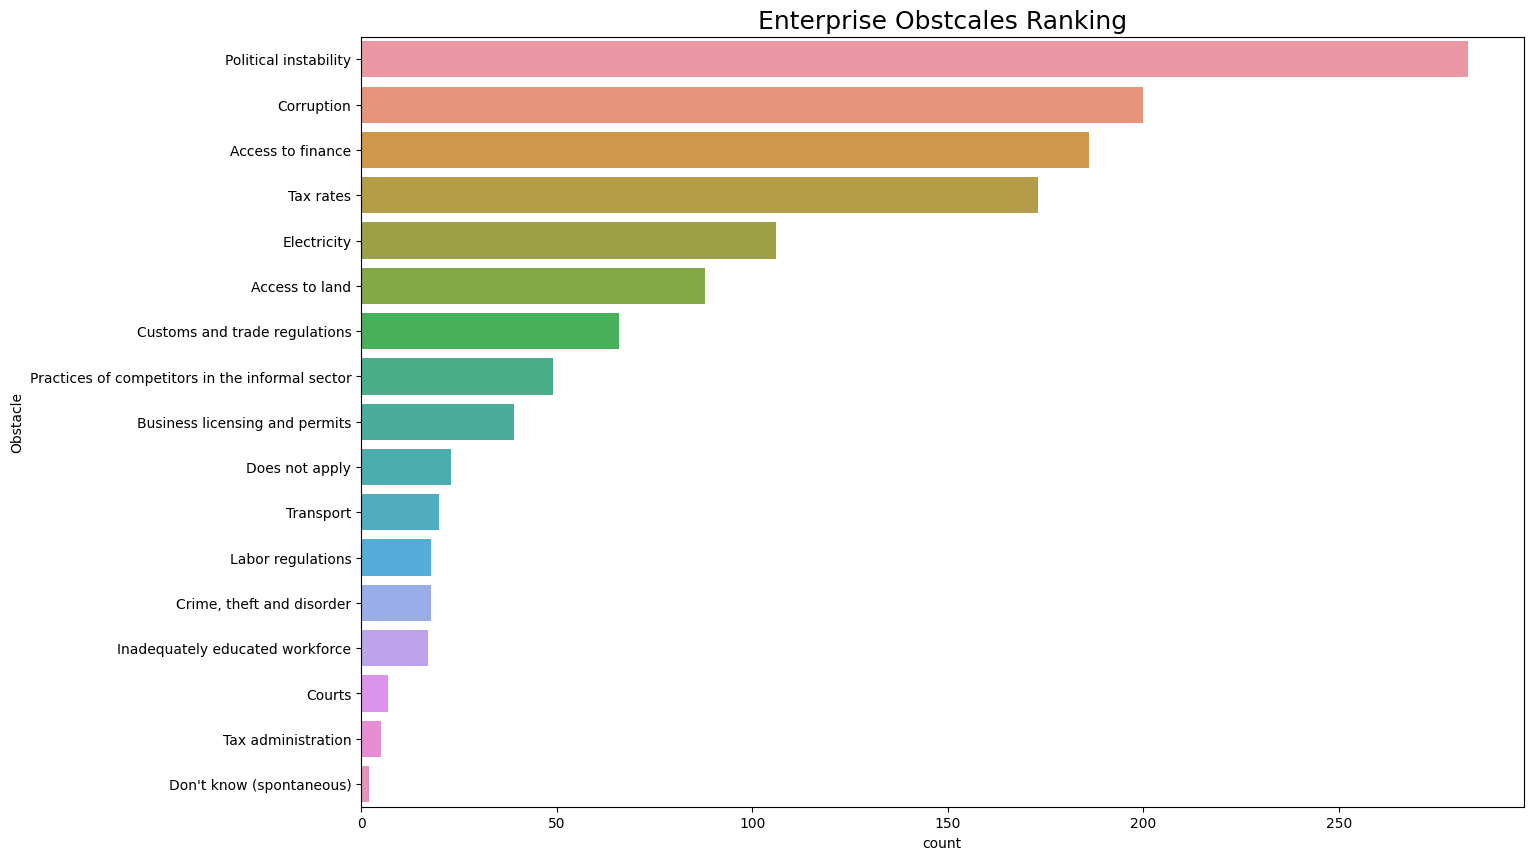

In [210]:
plt.figure(figsize=(15,10))
sns.countplot(df1,y='m1a', order=order.index)
plt.title('Enterprise Obstcales Ranking',fontsize=18)
plt.ylabel("Obstacle")
plt.show()

In [211]:
df1["m1a"].value_counts(normalize=True)*100

m1a
Political instability                              21.769231
Corruption                                         15.384615
Access to finance                                  14.307692
Tax rates                                          13.307692
Electricity                                         8.153846
Access to land                                      6.769231
Customs and trade regulations                       5.076923
Practices of competitors in the informal sector     3.769231
Business licensing and permits                      3.000000
Does not apply                                      1.769231
Transport                                           1.538462
Labor regulations                                   1.384615
Crime, theft and disorder                           1.384615
Inadequately educated workforce                     1.307692
Courts                                              0.538462
Tax administration                                  0.384615
Don't know (spontane

In [212]:
df1["k30"].value_counts(normalize=True)*100

k30
No obstacle                 33.384615
Minor obstacle              28.538462
Moderate obstacle           26.076923
Major obstacle               8.846154
Very severe obstacle         2.615385
Don't know (spontaneous)     0.307692
Does not apply               0.230769
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


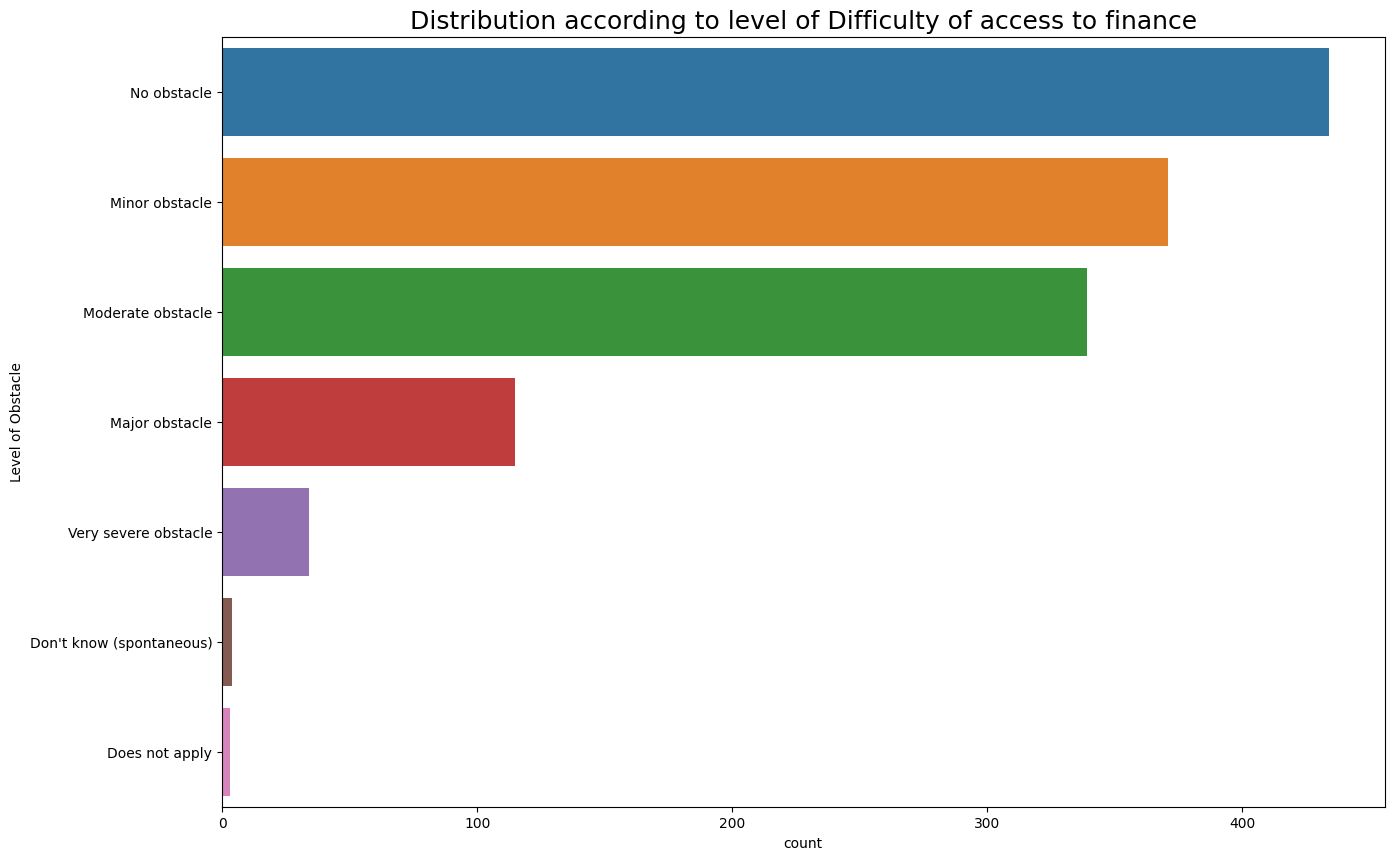

In [213]:
order = df1["k30"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k30',order= order.index)
plt.title('Distribution according to level of Difficulty of access to finance',fontsize=18)
plt.ylabel("Level of Obstacle")
plt.show()

In [214]:
df1['finance_obstacle'] = df1['k30'].copy()

df1['finance_obstacle'] = df1['finance_obstacle'].cat.add_categories(["Obstacle"])
df1.loc[(df1['k30'].isin(['Minor obstacle', 'Moderate obstacle','Major obstacle','Very severe obstacle'])), 'finance_obstacle'] = "Obstacle"
df1["finance_obstacle"]= df1["finance_obstacle"].cat.remove_categories(['Minor obstacle', 'Moderate obstacle','Major obstacle','Very severe obstacle'])


In [215]:
df1["finance_obstacle"].value_counts(normalize=True)*100

finance_obstacle
Obstacle                    66.076923
No obstacle                 33.384615
Don't know (spontaneous)     0.307692
Does not apply               0.230769
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


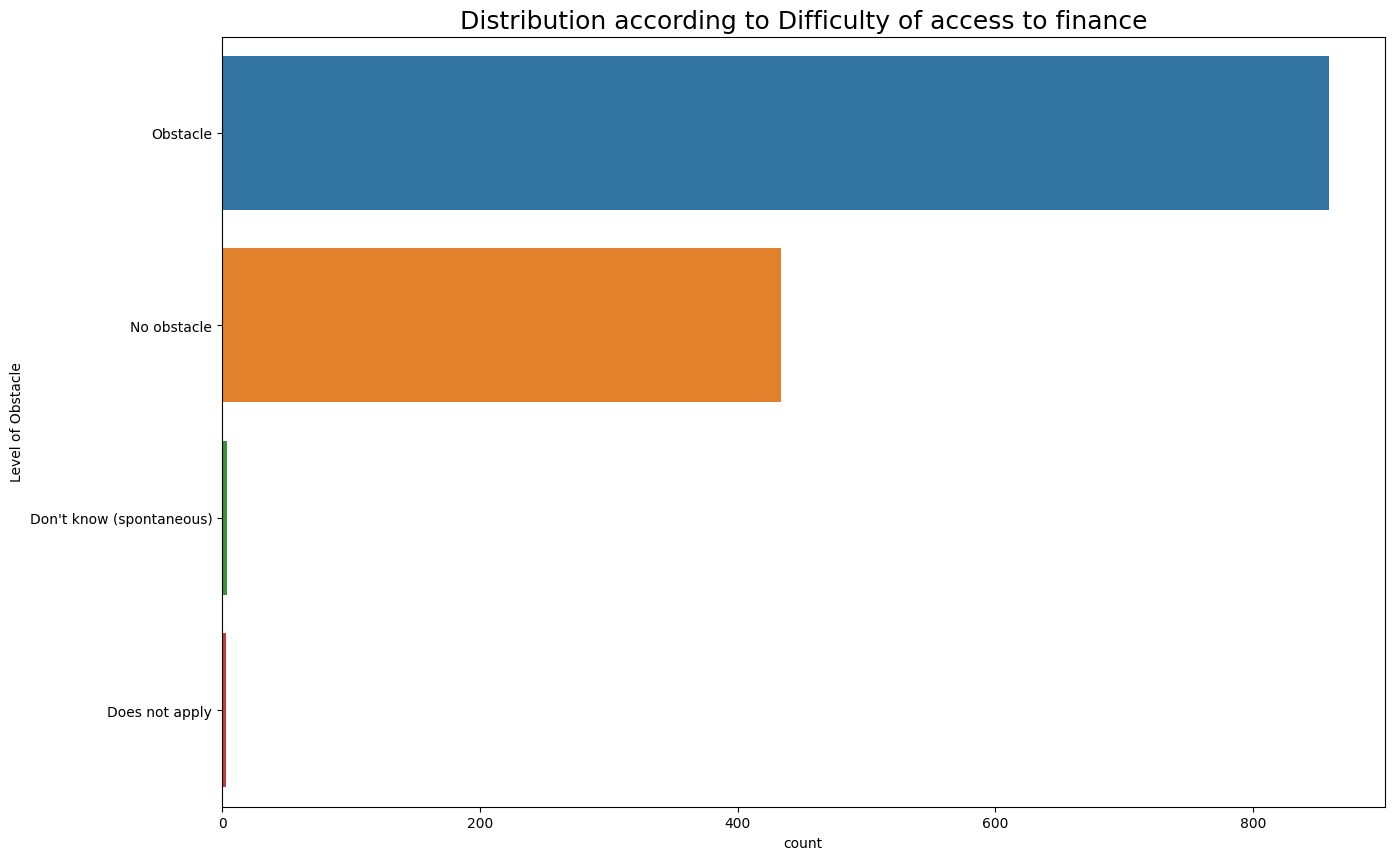

In [216]:
order = df1["finance_obstacle"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='finance_obstacle',order= order.index)
plt.title('Distribution according to Difficulty of access to finance',fontsize=18)
plt.ylabel("Level of Obstacle")
plt.show()

**What we conclude:**
* The top 4 obstacles in order are: Political instability (21.8%); Corruption (15.4%); Access to finance (14.3%); Tax rates (13.3%).
* About two third of the enterprises found financing an obstacle to a certain degree (range from minor obstacle up to very sever obstacle)


### **5. Locality characteristics: a3b - official Capital City?, a3c - Main Business City? & a3 -Size of Locality (a3)**

In [217]:
df1["a3"].value_counts(normalize=True)*100

a3
City with population over 1 million    87.692308
Over 250.000 to 1 million               5.538462
50.000 to 250.000                       4.615385
Less than 50.000                        2.153846
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


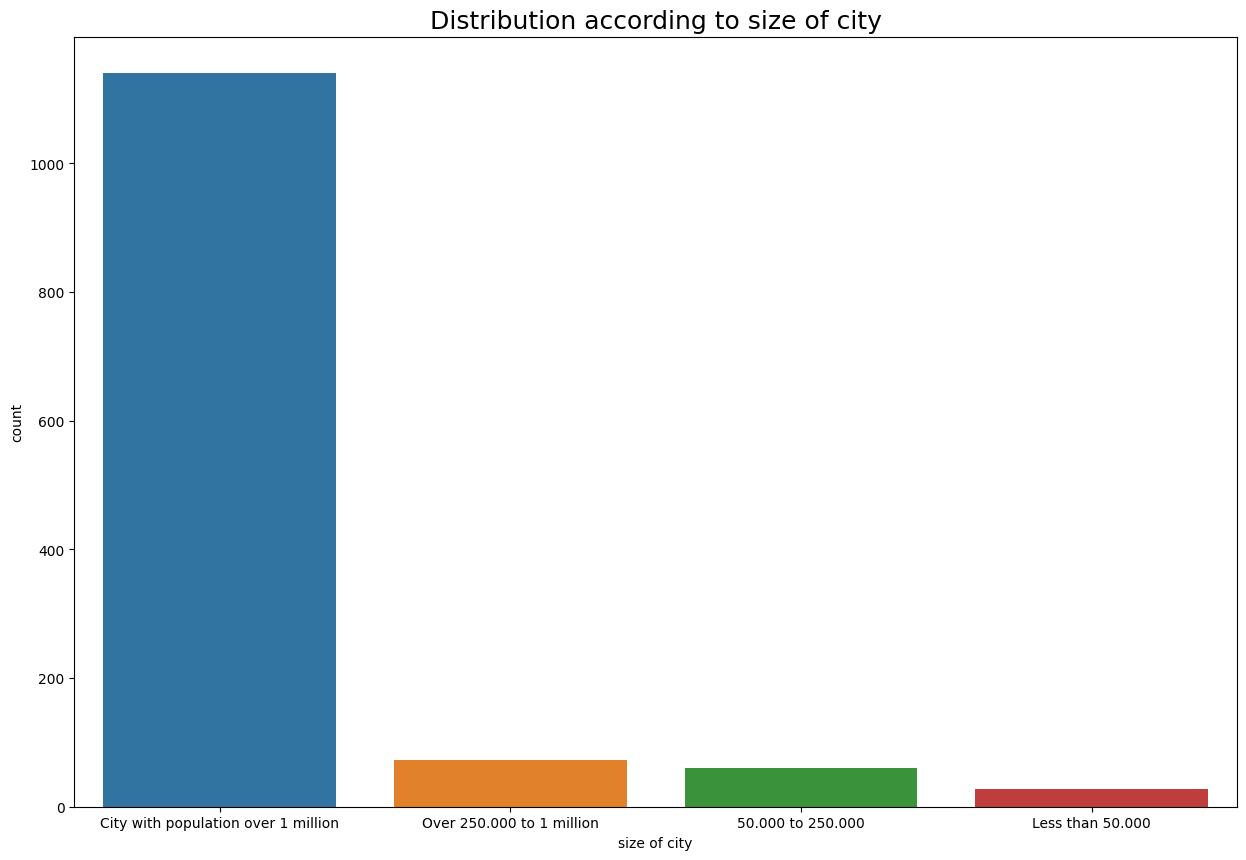

In [218]:
plt.figure(figsize=(15,10))
sns.countplot(df1,x='a3')
plt.title('Distribution according to size of city',fontsize=18)
plt.xlabel("size of city")
plt.show()

In [219]:
df1["a3b"].value_counts(normalize=True)*100

a3b
No     91.307692
Yes     8.692308
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


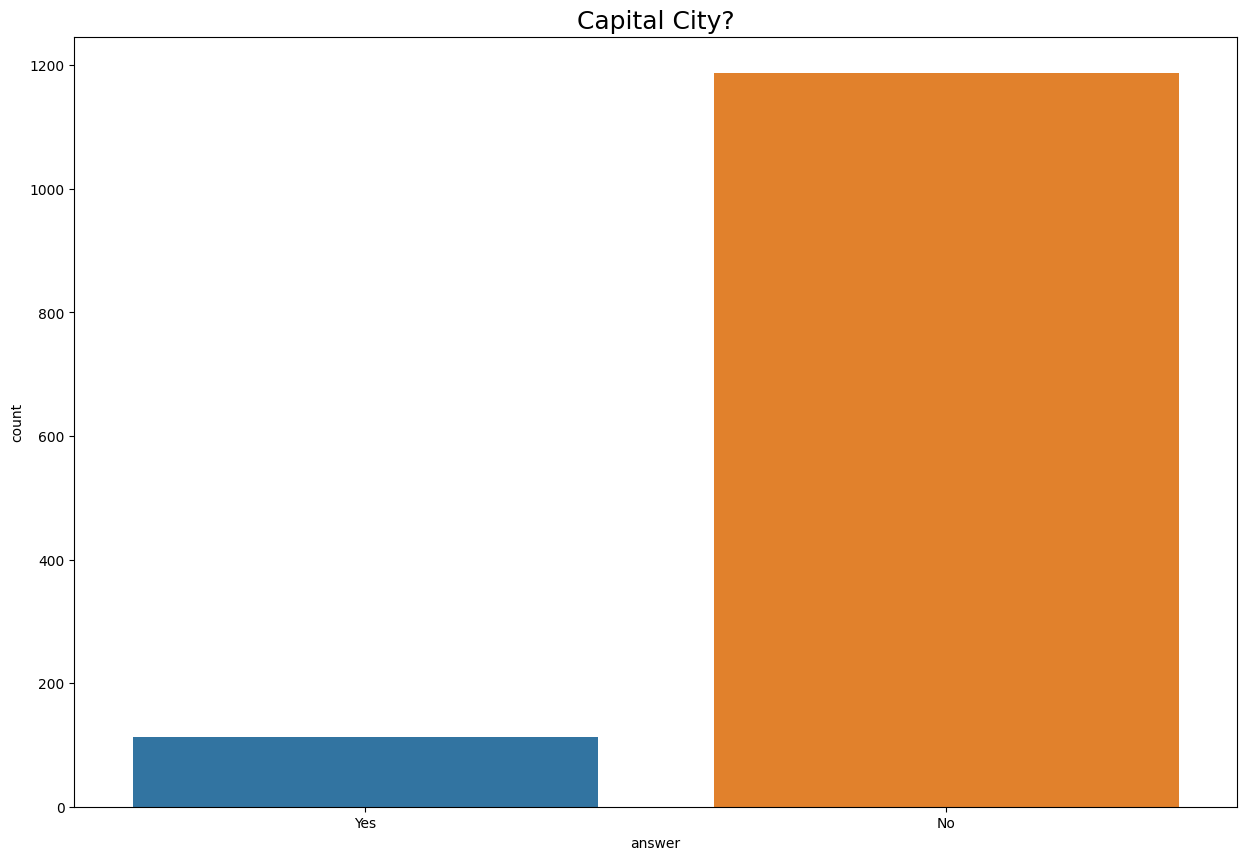

In [220]:
plt.figure(figsize=(15,10))
sns.countplot(df1,x='a3b')
plt.title('Capital City?',fontsize=18)
plt.xlabel("answer")
plt.show()

In [221]:
df1["a3c"].value_counts(normalize=True)*100

a3c
Yes    93.846154
No      6.153846
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


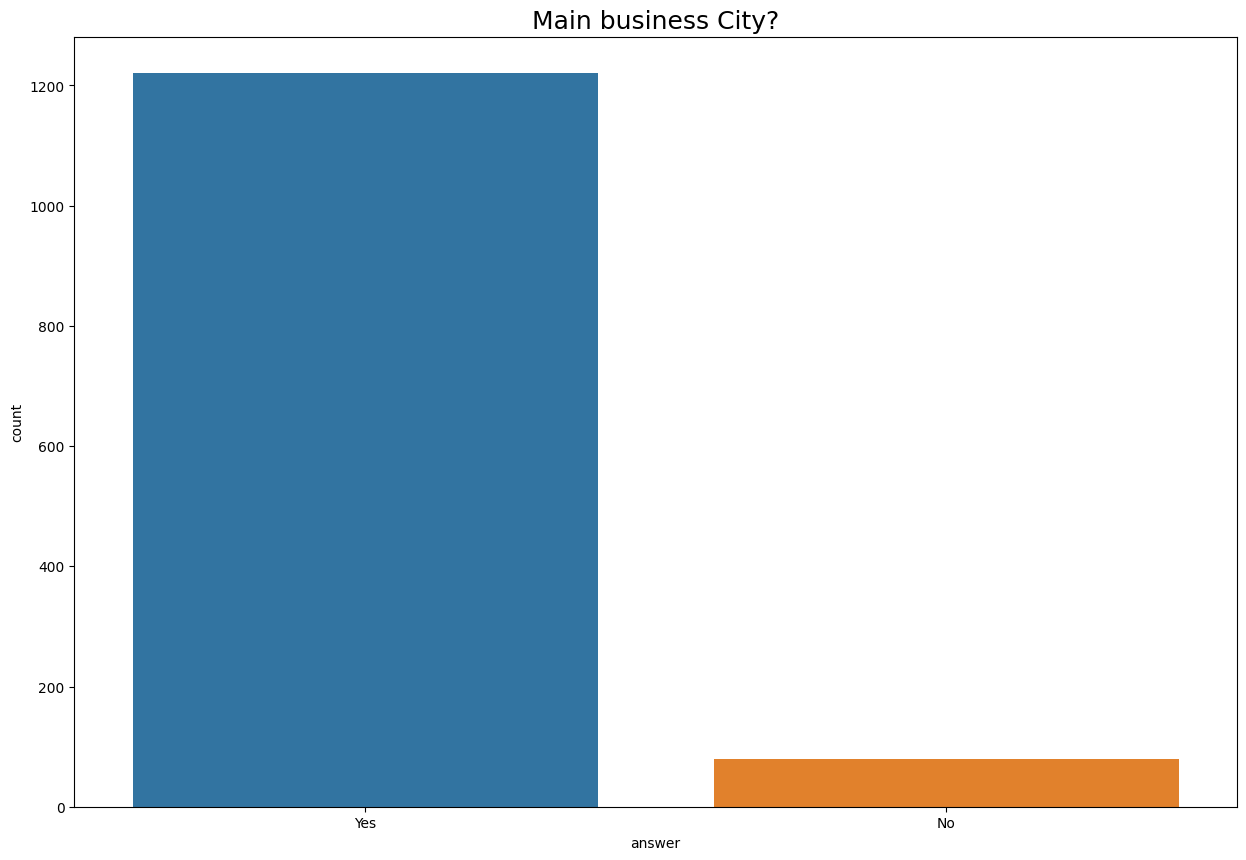

In [222]:
plt.figure(figsize=(15,10))
sns.countplot(df1,x='a3c')
plt.title('Main business City?',fontsize=18)
plt.xlabel("answer")
plt.show()

**What we can conclude:**
* The majority of enterprises are located in a city with population over 1 million,the majority are located also in a buisiness cities which are not capital cities.

### **6. E-payments,Mobile payement usage & Internet usage:**
   * k33 - Percentage of payments received using e-payments 
   * k34 - Main type of e-payment accepted 
   * k35 - Avg. days to receive main type of e-payment
   * k36 - Cost per transaction (% of transaction) to receive main type of e-payment
   * k37 - Monthly fees and subscription costs to receive main type of e-payment
   * k38 - Percentage of payments made using e-payments
   * k39 - Main type of e-payment used to make payments
   * k40 - Cost per transaction (% of transaction) to make main type of e-payment
   * PK25 - Does the firm use an internet connection? 
   * PK27 - Does this firm use mobile money? 

#### Received

In [223]:
df1["k33"].value_counts(normalize=True)*100

k33
0                           41.384615
Don't know (spontaneous)    12.615385
100                          9.000000
50                           5.692308
30                           4.692308
80                           4.384615
20                           3.692308
40                           3.538462
60                           3.153846
70                           3.153846
25                           2.307692
10                           1.615385
90                           1.230769
75                           0.846154
15                           0.615385
35                           0.538462
5                            0.461538
45                           0.230769
1                            0.153846
95                           0.153846
85                           0.076923
99                           0.076923
2                            0.076923
74                           0.076923
65                           0.076923
7                            0.076923
55      

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


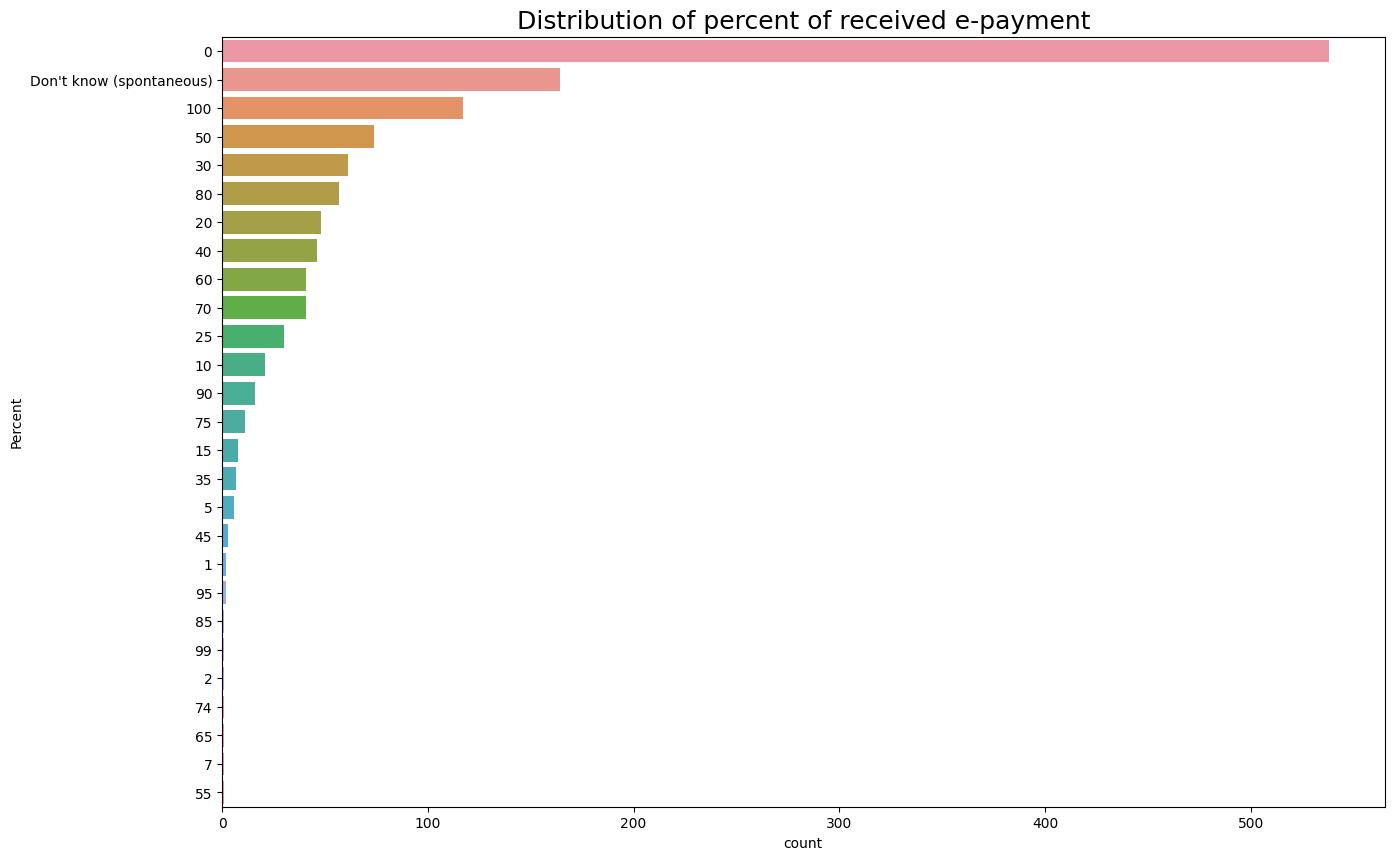

In [224]:
order = df1["k33"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k33',order= order.index)
plt.title('Distribution of percent of received e-payment',fontsize=18)
plt.ylabel("Percent")
plt.show()

In [225]:
df1["k34"].value_counts(normalize=True)*100

k34
Internet and mobile banking, including direct debit transfer    48.327759
Other                                                           22.575251
Debit cards                                                     20.234114
Credit cards                                                     5.351171
Mobile money                                                     2.508361
E-money and e-wallet, excluding mobile money                     0.836120
Don't know (spontaneous)                                         0.167224
Name: proportion, dtype: float64

In [226]:
df1["k34"].isna().sum()

702

In [227]:
df1['k34'] = df1['k34'].cat.add_categories(["Doesn't receive e-payment"])
df1.loc[(df1['k33'] == 0), 'k34'] = "Doesn't receive e-payment"

In [228]:
df1["k34"].value_counts(normalize=True,dropna=False)*100

k34
Doesn't receive e-payment                                       41.384615
Internet and mobile banking, including direct debit transfer    22.230769
NaN                                                             12.615385
Other                                                           10.384615
Debit cards                                                      9.307692
Credit cards                                                     2.461538
Mobile money                                                     1.153846
E-money and e-wallet, excluding mobile money                     0.384615
Don't know (spontaneous)                                         0.076923
Name: proportion, dtype: float64

In [229]:
df1["k34"].isna().sum()

164

In [230]:
df1[df1["k34"].isna()]["k33"].value_counts(dropna=False)

k33
Don't know (spontaneous)    164
50                            0
99                            0
95                            0
90                            0
85                            0
80                            0
75                            0
74                            0
70                            0
65                            0
60                            0
55                            0
45                            0
0                             0
40                            0
35                            0
30                            0
25                            0
20                            0
15                            0
10                            0
7                             0
5                             0
2                             0
1                             0
100                           0
Name: count, dtype: int64

In [231]:
df1.loc[df1['k33'] == "Don't know (spontaneous)", 'k34'] = "Don't know (spontaneous)"

In [232]:
df1["k34"].isna().sum()

0

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


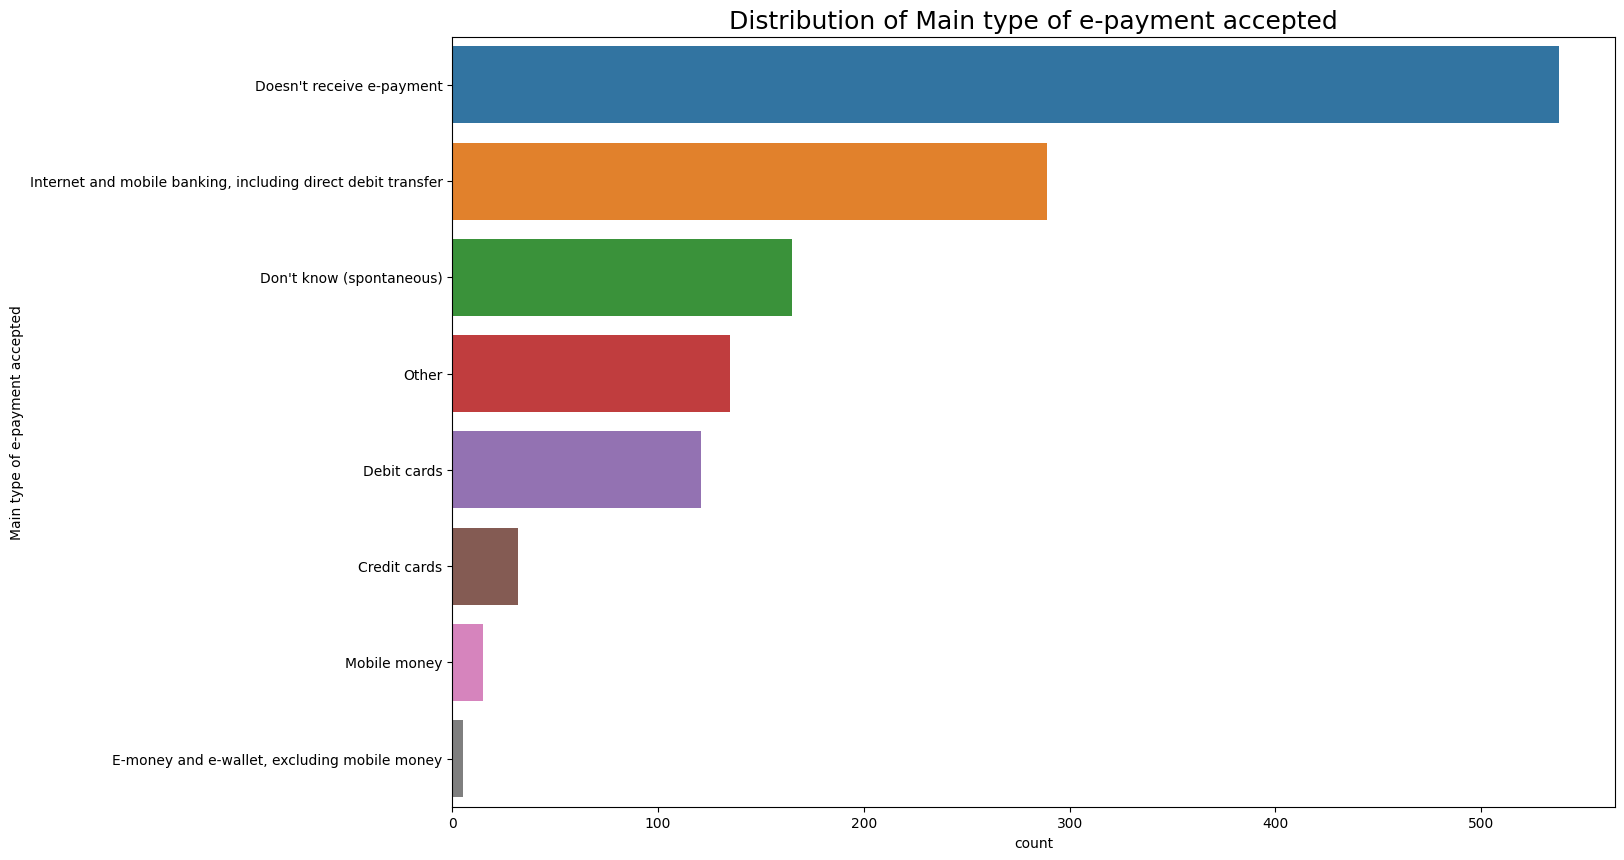

In [233]:
order = df1["k34"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k34',order= order.index)
plt.title('Distribution of Main type of e-payment accepted',fontsize=18)
plt.ylabel("Main type of e-payment accepted")
plt.show()

In [234]:
df1["k35"].isna().sum()

703

In [235]:
df1['k35'] = df1['k35'].cat.add_categories(["Doesn't receive e-payment"])
df1.loc[(df1['k33'] == 0), 'k35'] = "Doesn't receive e-payment"

In [236]:
df1["k35"].isna().sum()

165

In [237]:
df1[df1["k35"].isna()]["k33"].value_counts(dropna=False)

k33
Don't know (spontaneous)    164
90                            1
50                            0
99                            0
95                            0
85                            0
80                            0
75                            0
74                            0
70                            0
65                            0
60                            0
55                            0
45                            0
0                             0
40                            0
35                            0
30                            0
25                            0
20                            0
15                            0
10                            0
7                             0
5                             0
2                             0
1                             0
100                           0
Name: count, dtype: int64

In [238]:
df1.loc[df1['k33'] == "Don't know (spontaneous)", 'k35'] = "Don't know (spontaneous)"

In [239]:
df1["k35"].value_counts(dropna=False)

k35
Doesn't receive e-payment              538
Payment received in less than a day    334
Don't know (spontaneous)               169
3.0                                     39
5.0                                     29
10.0                                    29
15.0                                    26
8.0                                     23
2.0                                     22
1.0                                     22
20.0                                    16
4.0                                     15
6.0                                     10
7.0                                      8
12.0                                     7
25.0                                     3
35.0                                     3
14.0                                     2
18.0                                     2
9.0                                      1
40.0                                     1
NaN                                      1
Name: count, dtype: int64

In [240]:
delay = df1[(df1["k35"]!="Doesn't receive e-payment" )& (df1["k35"]!="Don't know (spontaneous)")]
delay["k35"].value_counts(normalize=True)*100

k35
Payment received in less than a day    56.418919
3.0                                     6.587838
5.0                                     4.898649
10.0                                    4.898649
15.0                                    4.391892
8.0                                     3.885135
1.0                                     3.716216
2.0                                     3.716216
20.0                                    2.702703
4.0                                     2.533784
6.0                                     1.689189
7.0                                     1.351351
12.0                                    1.182432
25.0                                    0.506757
35.0                                    0.506757
18.0                                    0.337838
14.0                                    0.337838
40.0                                    0.168919
9.0                                     0.168919
Don't know (spontaneous)                0.000000
Doesn't receive 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


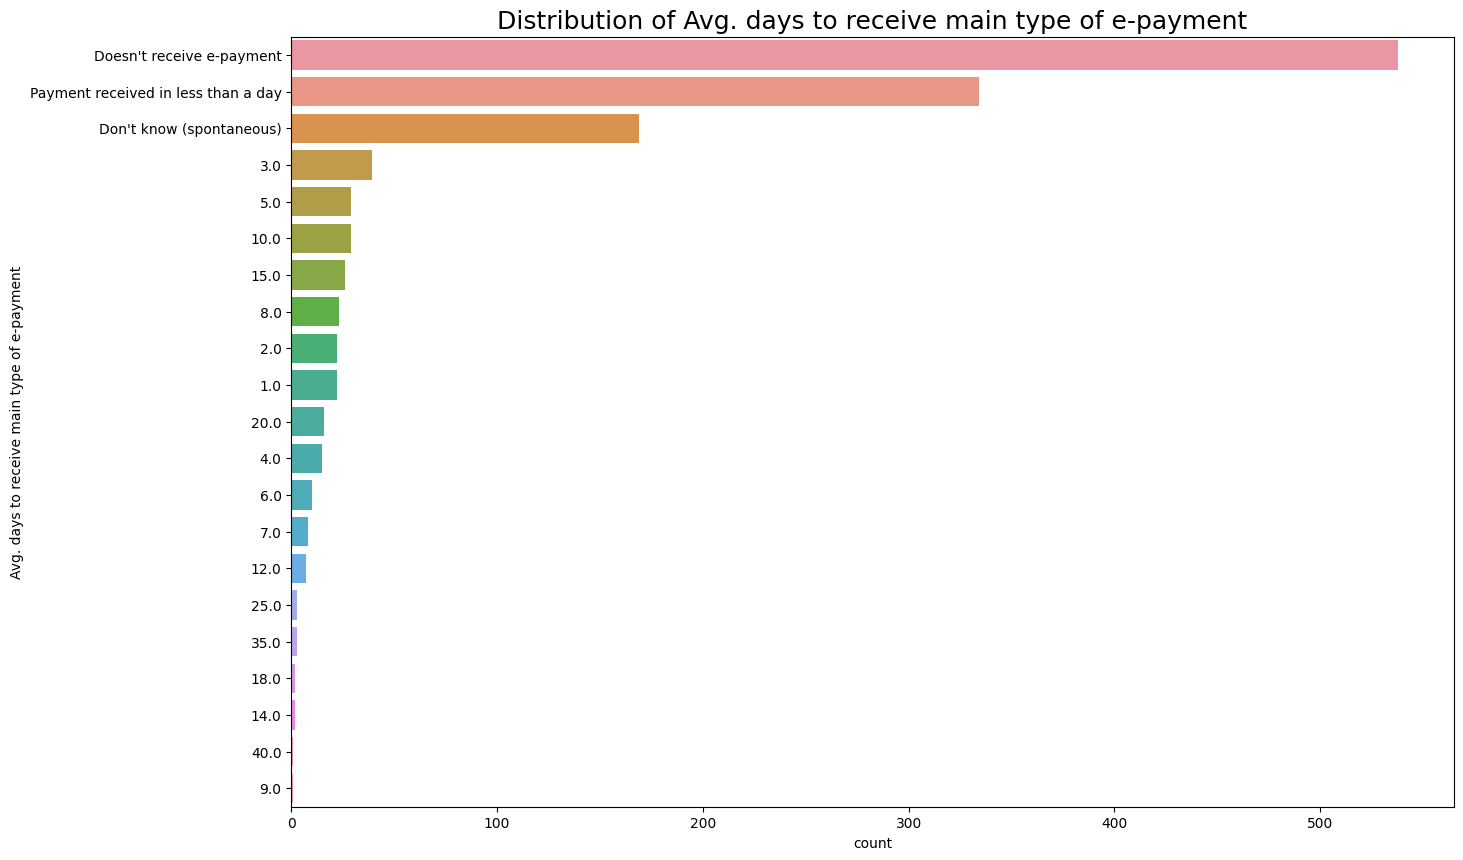

In [241]:
order = df1["k35"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k35',order= order.index)
plt.title('Distribution of Avg. days to receive main type of e-payment',fontsize=18)
plt.ylabel("Avg. days to receive main type of e-payment")
plt.show()

In [242]:
# Create a new column for avg.days to merge all values > 1 to "Payment received in more than a day"
df1['payment_avg_rec_days'] = df1['k35'].copy()

df1['payment_avg_rec_days'] = df1['payment_avg_rec_days'].cat.add_categories(["Payment received between 2 to 5 days","Payment received in more than 5 days"])
df1.loc[(df1['k35']!="Doesn't receive e-payment")&(df1['k35']!="Payment received in less than a day")&(df1['k35']!="Don't know (spontaneous)") &(df1['k35']<=5), 'payment_avg_rec_days'] = "Payment received between 2 to 5 days"
df1.loc[(df1['k35']!="Doesn't receive e-payment")&(df1['k35']!="Payment received in less than a day")&(df1['k35']!="Don't know (spontaneous)") &(df1['k35']>5), 'payment_avg_rec_days'] = "Payment received in more than 5 days"
df1["payment_avg_rec_days"]= df1["payment_avg_rec_days"].cat.remove_unused_categories()


In [243]:
df1["payment_avg_rec_days"].value_counts(dropna=False)

payment_avg_rec_days
Doesn't receive e-payment               538
Payment received in less than a day     334
Don't know (spontaneous)                169
Payment received in more than 5 days    131
Payment received between 2 to 5 days    127
NaN                                       1
Name: count, dtype: int64

In [244]:
delay_firm_rec_only= df1[(df1["payment_avg_rec_days"]!="Doesn't receive e-payment")&(df1["payment_avg_rec_days"]!="Don't know (spontaneous)")]
delay_firm_rec_only["payment_avg_rec_days"].value_counts(normalize=True)*100

payment_avg_rec_days
Payment received in less than a day     56.418919
Payment received in more than 5 days    22.128378
Payment received between 2 to 5 days    21.452703
Don't know (spontaneous)                 0.000000
Doesn't receive e-payment                0.000000
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


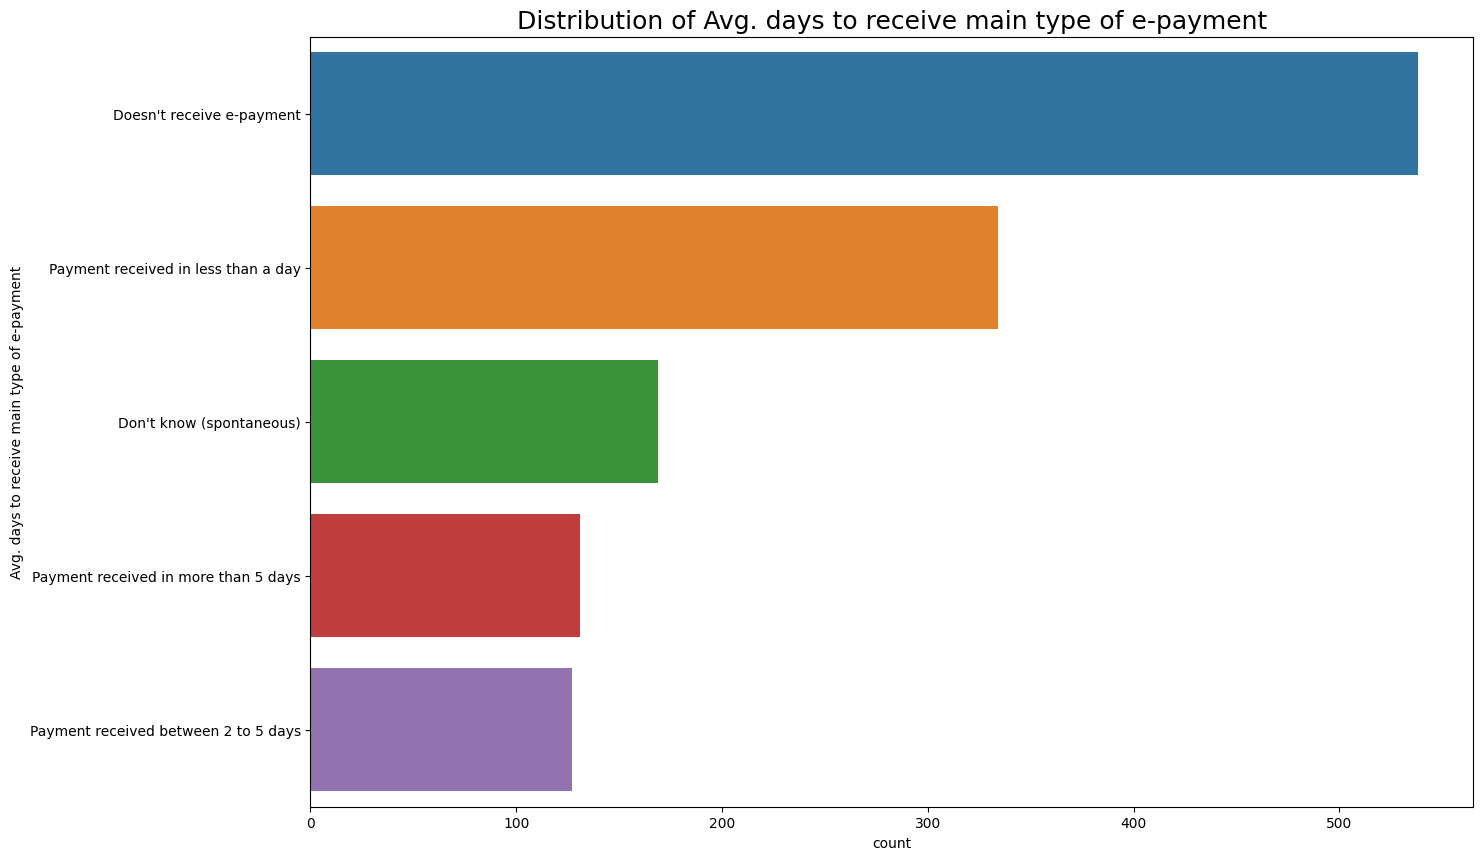

In [245]:
order = df1["payment_avg_rec_days"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='payment_avg_rec_days',order= order.index)
plt.title('Distribution of Avg. days to receive main type of e-payment',fontsize=18)
plt.ylabel("Avg. days to receive main type of e-payment")
plt.show()

In [246]:
df1['k36'] = df1['k36'].cat.add_categories(["Doesn't receive e-payment"])
df1.loc[(df1['k33'] == 0), 'k36'] = "Doesn't receive e-payment"

In [247]:
df1['k36'].value_counts(dropna=False)

k36
Doesn't receive e-payment    538
0.0                          295
NaN                          165
1.0                          140
2.0                           58
Don't know (spontaneous)      45
3.0                           41
5.0                           16
4.0                            1
8.0                            1
Name: count, dtype: int64

In [248]:
df1.loc[df1['k33'] == "Don't know (spontaneous)", 'k36'] = "Don't know (spontaneous)"

In [249]:
df1['k36'].value_counts(dropna=False, normalize=True)*100

k36
Doesn't receive e-payment    41.384615
0.0                          22.692308
Don't know (spontaneous)     16.076923
1.0                          10.769231
2.0                           4.461538
3.0                           3.153846
5.0                           1.230769
4.0                           0.076923
8.0                           0.076923
NaN                           0.076923
Name: proportion, dtype: float64

In [250]:
# slice the column to get only the observations that use e-payment
percent_of_trans_rec = df1[(df1["k36"]!="Doesn't receive e-payment")& (df1["k36"]!="Don't know (spontaneous)")]
percent_of_trans_rec["k36"].value_counts(dropna=False,normalize=True)*100

k36
0.0                          53.345389
1.0                          25.316456
2.0                          10.488246
3.0                           7.414105
5.0                           2.893309
4.0                           0.180832
8.0                           0.180832
NaN                           0.180832
Don't know (spontaneous)      0.000000
Doesn't receive e-payment     0.000000
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


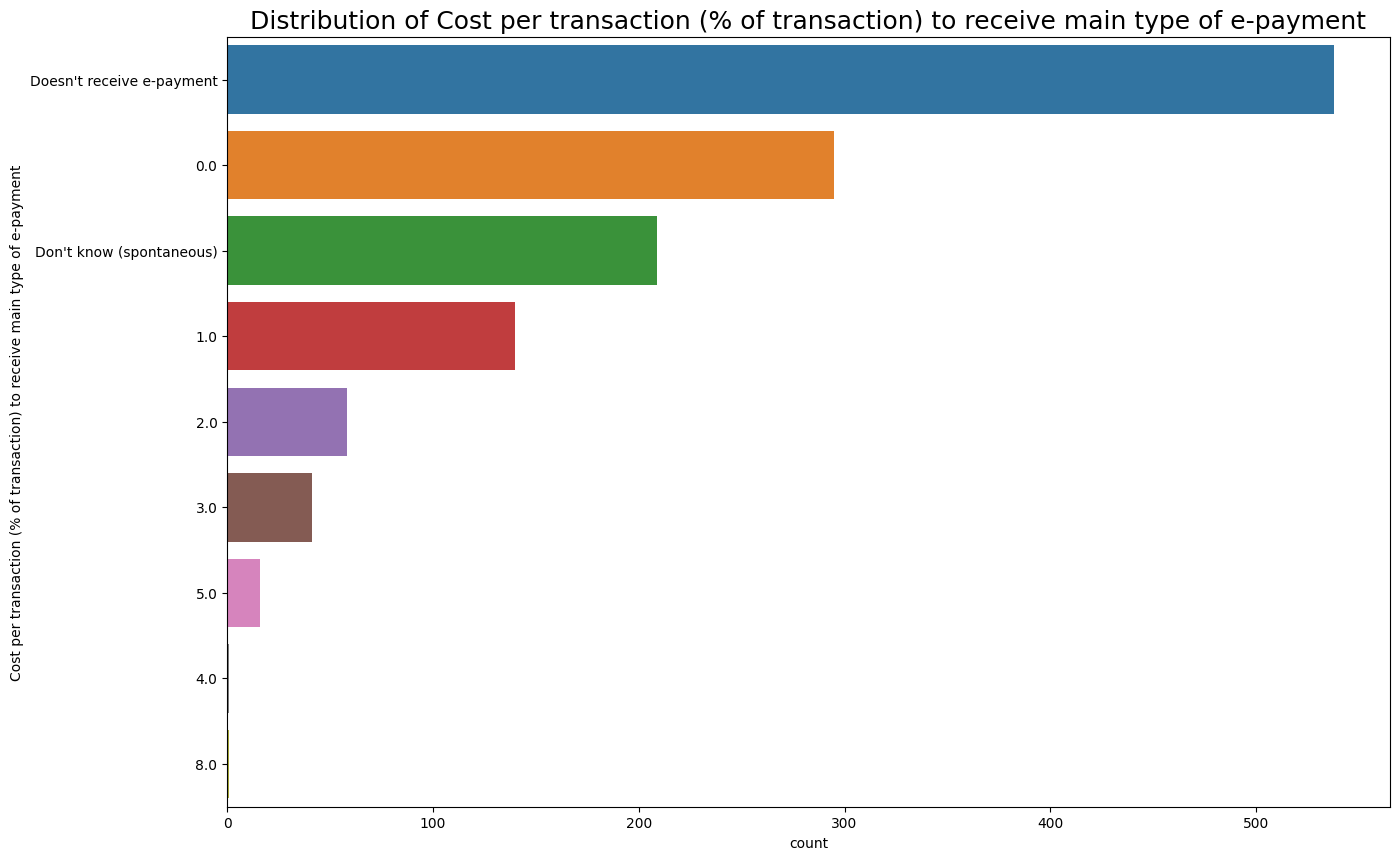

In [251]:
order = df1["k36"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k36',order= order.index)
plt.title('Distribution of Cost per transaction (% of transaction) to receive main type of e-payment',fontsize=18)
plt.ylabel("Cost per transaction (% of transaction) to receive main type of e-payment")
plt.show()

In [252]:
df1['k37'].value_counts(dropna=False)

k37
NaN                         703
0.0                         287
Don't know (spontaneous)     75
800.0                        40
1.0                          32
25000.0                      13
2.0                           8
900.0                         8
600.0                         8
500.0                         7
750.0                         7
850.0                         6
30000.0                       6
20000.0                       6
1000.0                        6
3.0                           5
1200.0                        4
2500.0                        4
700.0                         4
780.0                         4
1500.0                        3
5000.0                        3
40000.0                       3
50000.0                       3
1400.0                        3
400.0                         3
300.0                         3
10000.0                       2
820.0                         2
800000.0                      2
25.0                          2
2500

The monthly fees doesnt give much indication since there are numerous fees vary a lot in addition to the donnot receive and dont know answers' count . I drop it.

#### Make

In [253]:
df1['k38'].value_counts(dropna=False)

k38
0                           664
Don't know (spontaneous)    200
100                          99
50                           67
80                           53
70                           37
20                           30
30                           30
40                           30
60                           18
25                           14
15                           10
10                            9
1                             8
75                            8
90                            7
13                            4
35                            3
45                            3
5                             2
2                             2
4                             1
6                             1
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


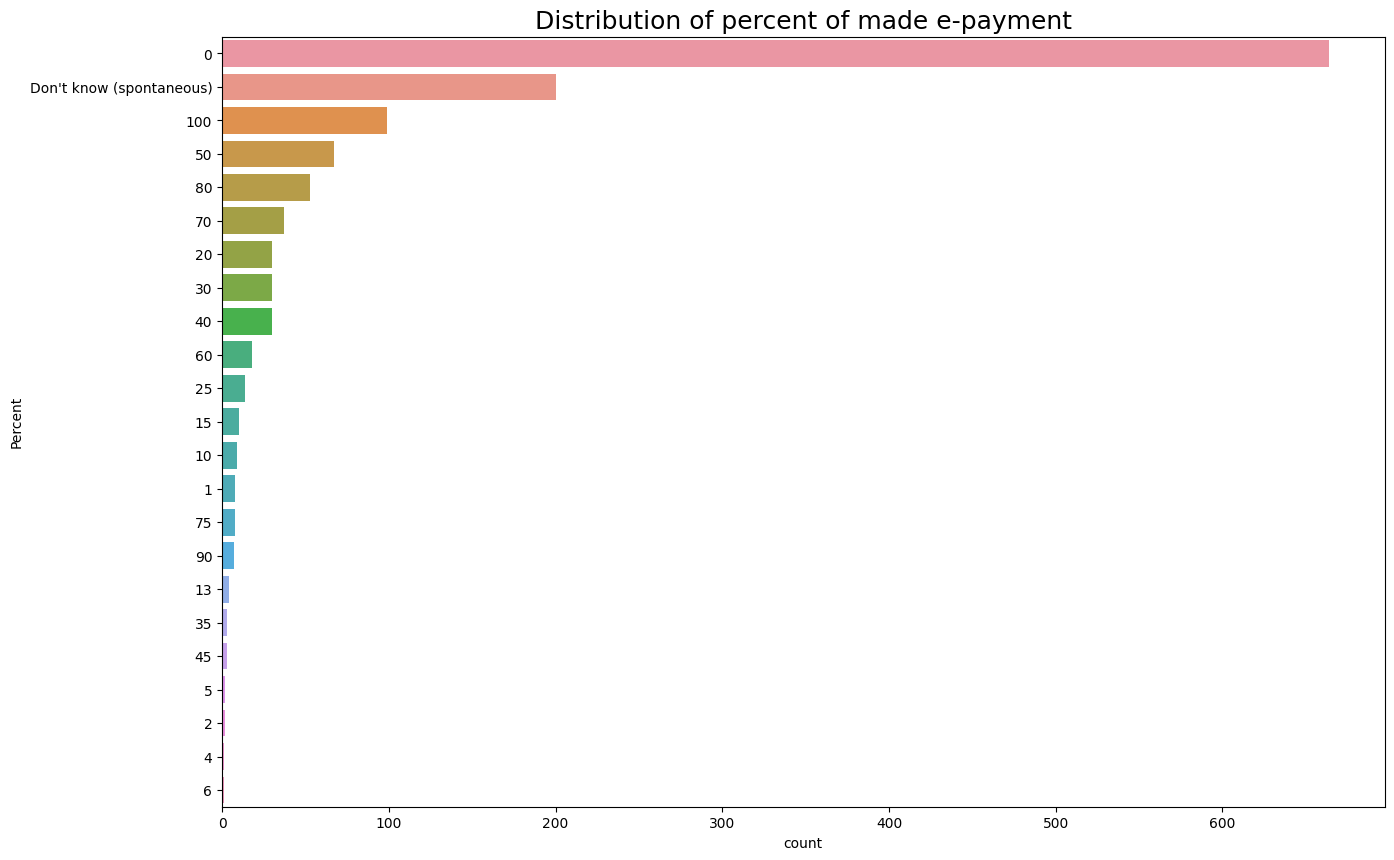

In [254]:
order = df1["k38"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k38',order= order.index)
plt.title('Distribution of percent of made e-payment',fontsize=18)
plt.ylabel("Percent")
plt.show()

In [255]:
df1["k39"].value_counts(dropna=False)

k39
NaN                                                             864
Internet and mobile banking, including direct debit transfer    252
Other                                                           132
Debit cards                                                      21
Credit cards                                                     21
Mobile money                                                      8
E-money and e-wallet, excluding mobile money                      2
Name: count, dtype: int64

In [256]:
df1['k39'] = df1['k39'].cat.add_categories(["Doesn't make e-payment","Don't know (spontaneous)"])
df1.loc[(df1['k38'] == 0), 'k39'] = "Doesn't make e-payment"

In [257]:
df1["k39"].value_counts(dropna=False)

k39
Doesn't make e-payment                                          664
Internet and mobile banking, including direct debit transfer    252
NaN                                                             200
Other                                                           132
Debit cards                                                      21
Credit cards                                                     21
Mobile money                                                      8
E-money and e-wallet, excluding mobile money                      2
Don't know (spontaneous)                                          0
Name: count, dtype: int64

In [258]:
df1.loc[df1['k38'] == "Don't know (spontaneous)", 'k39'] = "Don't know (spontaneous)"

In [259]:
df1["k39"].value_counts(normalize=True,dropna=False)*100

k39
Doesn't make e-payment                                          51.076923
Internet and mobile banking, including direct debit transfer    19.384615
Don't know (spontaneous)                                        15.384615
Other                                                           10.153846
Debit cards                                                      1.615385
Credit cards                                                     1.615385
Mobile money                                                     0.615385
E-money and e-wallet, excluding mobile money                     0.153846
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


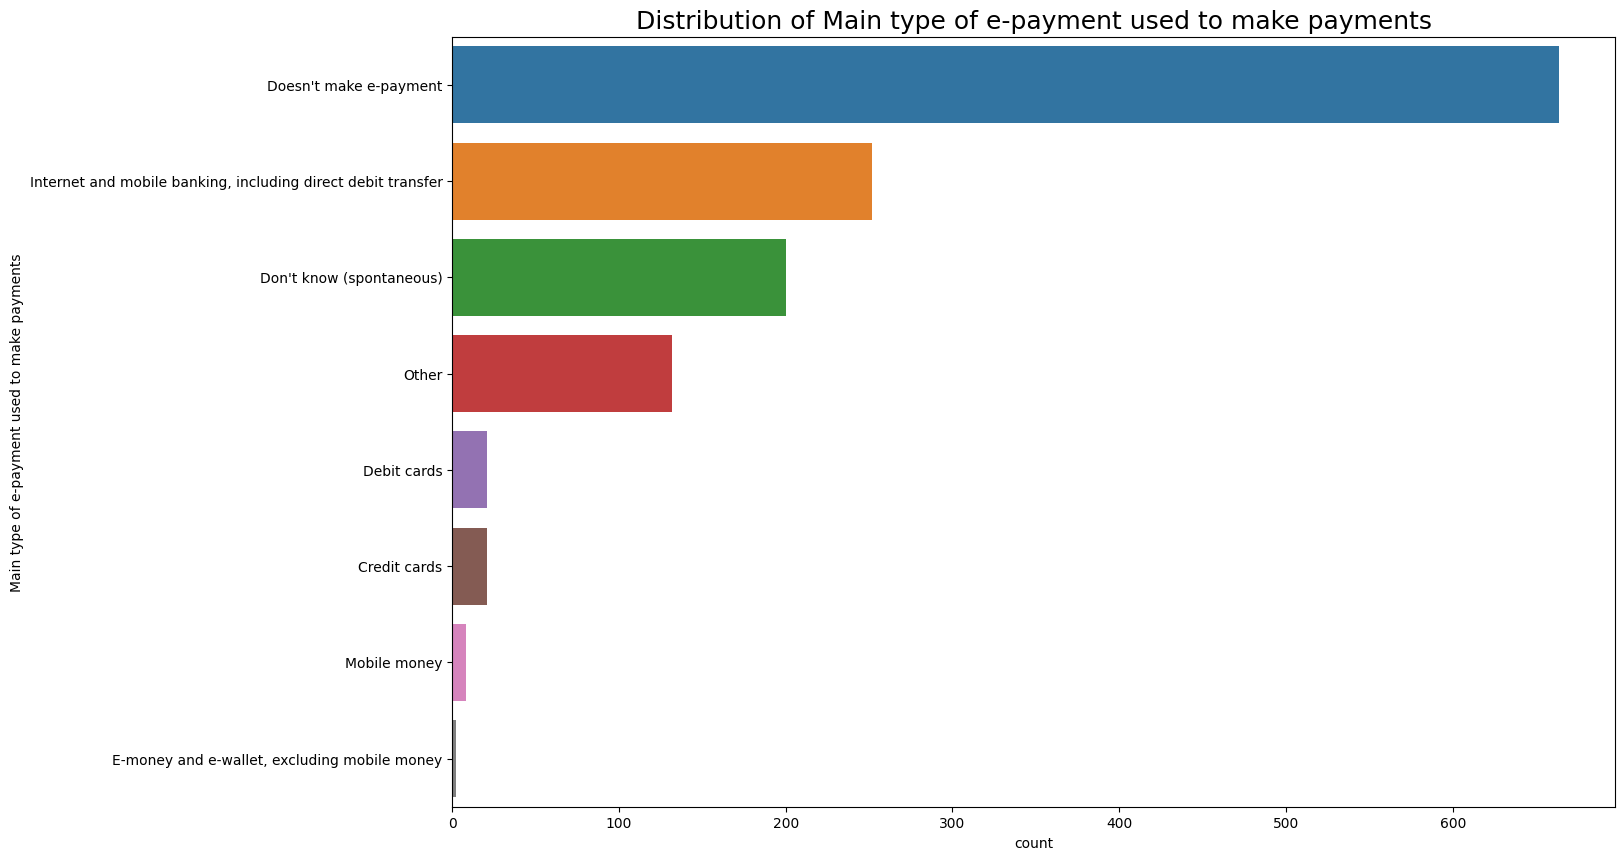

In [260]:
order = df1["k39"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k39',order= order.index)
plt.title('Distribution of Main type of e-payment used to make payments',fontsize=18)
plt.ylabel("Main type of e-payment used to make payments")
plt.show()

In [261]:
df1["k40"].value_counts(dropna=False)

k40
NaN                         864
0.0                         190
1.0                         146
2.0                          50
Don't know (spontaneous)     25
3.0                          12
5.0                           7
10.0                          3
15.0                          2
6.0                           1
Name: count, dtype: int64

In [262]:
df1['k40'] = df1['k40'].cat.add_categories(["Doesn't make e-payment"])
df1.loc[(df1['k38'] == 0), 'k40'] = "Doesn't make e-payment"
df1.loc[(df1['k38'] == "Don't know (spontaneous)"), 'k40'] = "Don't know (spontaneous)"

In [263]:
df1["k40"].value_counts(dropna=False,normalize=True)*100

k40
Doesn't make e-payment      51.076923
Don't know (spontaneous)    17.307692
0.0                         14.615385
1.0                         11.230769
2.0                          3.846154
3.0                          0.923077
5.0                          0.538462
10.0                         0.230769
15.0                         0.153846
6.0                          0.076923
Name: proportion, dtype: float64

In [264]:
# slice the column to get only the observations that use e-payment
percent_of_trans = df1[(df1["k40"]!="Doesn't make e-payment")& (df1["k40"]!="Don't know (spontaneous)")]
percent_of_trans["k40"].value_counts(dropna=False,normalize=True)*100

k40
0.0                         46.228710
1.0                         35.523114
2.0                         12.165450
3.0                          2.919708
5.0                          1.703163
10.0                         0.729927
15.0                         0.486618
6.0                          0.243309
Don't know (spontaneous)     0.000000
Doesn't make e-payment       0.000000
Name: proportion, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


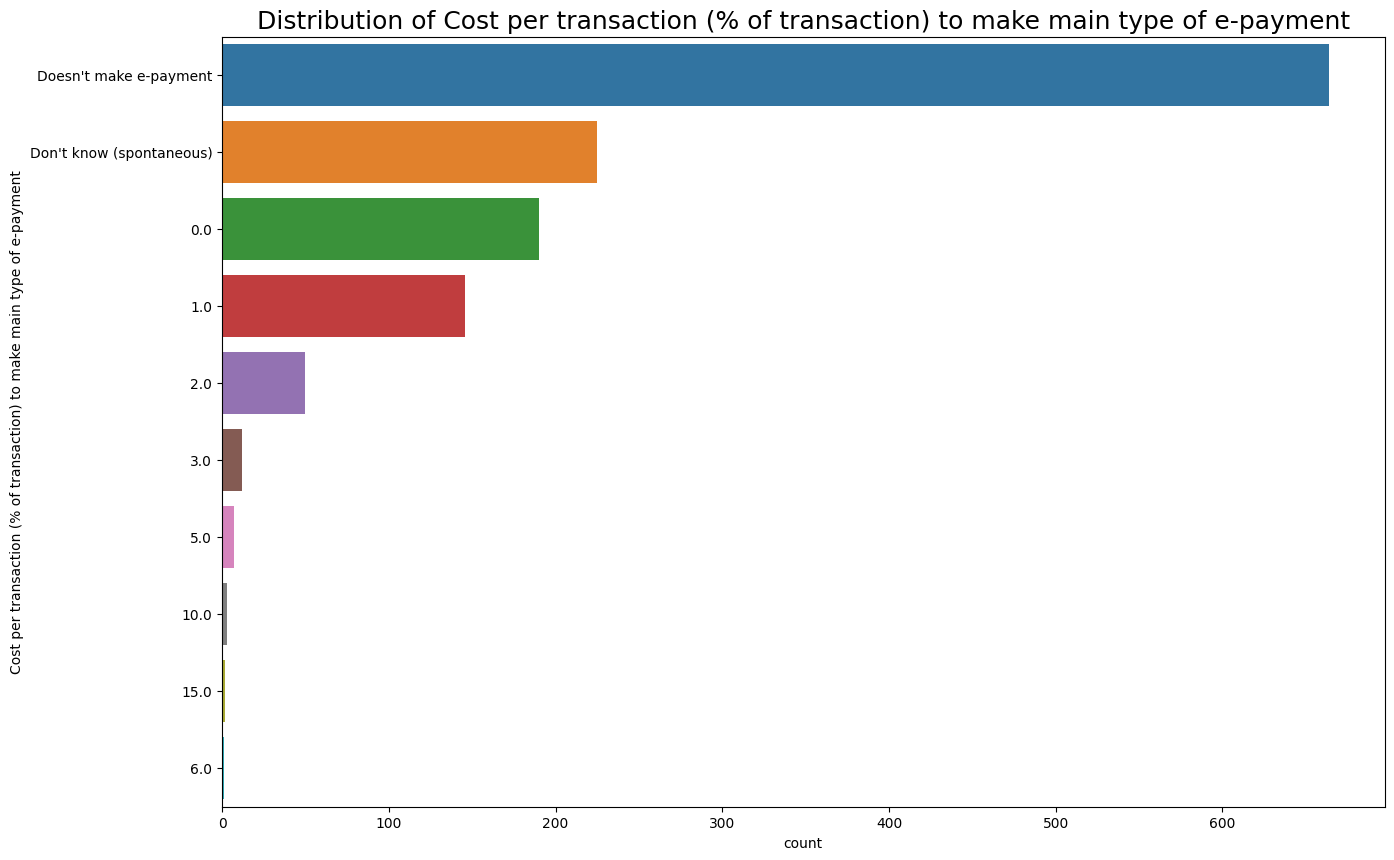

In [265]:
order = df1["k40"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='k40',order= order.index)
plt.title('Distribution of Cost per transaction (% of transaction) to make main type of e-payment',fontsize=18)
plt.ylabel("Cost per transaction (% of transaction) to make main type of e-payment")
plt.show()

* Are the companies who receive e-payment are those who make e-payment?

In [266]:
df1.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata,finance_obstacle,payment_avg_rec_days
0,Medium,Panel,Food and beverage,Manufacturing,Islamabad,38,Medium,31,7,2022,15,12,90,Urdu,Establishment,0,1,Yes,Yes,2.0,Yes,No,Yes,NaN,2021,6,30,Sole proprietorship,100,Yes,100,0,0,0,No,NaN,1995,108,1995,7,No,No,No,NaN,NaN,NaN,6000,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,2000,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,The establishment does not have an internet co...,NaN,NaN,NaN,NaN,With some difficulty,No obstacle,NaN,NaN,NaN,100,150000000.0,150000000.0,140000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No obstacle,No obstacle,Yes,No,Strongly agree,Strongly agree,We fixed it but did not take further action,Yes,1-2 production performance indicators,No,NaN,NaN,NaN,No,NaN,Does not apply (spontaneous),Rarely or never,National â main product sold mostly across t...,60.0,NaN,25.0,No,"Small or medium private firms, excluding this ...",No,No,No,No,No,No,Domestic private firms operating in the same p...,They avoid labor taxes or regulations,Regulations that restrict the establishmentâ...,No,"Yes, there is more competition",Prices set by HQ,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,100.0,106.0,Availability of skilled labor force,Access to markets,100,100,No,NaN,NaN,Does not apply (spontaneous),NaN,NaN,NaN,NaN,No obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,No obstacle,Yes,80,0,0,20,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,No need for a loan - establishment had suffici...,No need for a loan - establishment had enough ...,NaN,NaN,

In [267]:
#create a column for reception of e-payment and another for makin e-payment. Consider Dont know as NO.
df1["rec_epayment"]=[ 0 if (x=="Don't know (spontaneous)" or x==0.0 ) else 1 for x in df1["k33"] ] 
df1["mak_epayment"]=[ 0 if (x=="Don't know (spontaneous)" or x==0.0 ) else 1 for x in df1["k38"] ] 

In [268]:
df1["rec_epayment"].value_counts(normalize=True)*100

rec_epayment
0    54.0
1    46.0
Name: proportion, dtype: float64

In [269]:
df1["mak_epayment"].value_counts(normalize=True)*100

mak_epayment
0    66.461538
1    33.538462
Name: proportion, dtype: float64

In [270]:
df1[["rec_epayment","k33", "mak_epayment","k38"]].head(10)

,rec_epayment,k33,mak_epayment,k38
0,0,0,0,0
1,1,40,1,50
2,0,0,0,0
3,1,60,0,0
4,1,60,0,0
5,1,10,0,0
6,1,30,1,20
7,0,0,0,0
8,1,70,0,0
9,1,50,1,50


In [271]:
rec_mak_enterprises = df1[df1["rec_epayment"]!=df1["mak_epayment"]]
rec_mak_enterprises.shape

(216, 417)

In [272]:
rec_mak_enterprises["mak_epayment"].value_counts()

mak_epayment
0    189
1     27
Name: count, dtype: int64

In [273]:
rec_mak_enterprises["rec_epayment"].value_counts()

rec_epayment
1    189
0     27
Name: count, dtype: int64

Not all enterprises who make e-payment recieve e-payment and the other way around.
Details: **189 enterprises make e-payment but dont receive vs 27 who receive and dont make.**
        

* What is the relation with internet connection?

In [274]:
df1["PK25"].describe()

count     1300
unique       3
top        Yes
freq      1005
Name: PK25, dtype: object

In [275]:
df1["PK25"].value_counts(normalize=True)*100

PK25
Yes                         77.307692
No                          22.615385
Don't know (spontaneous)     0.076923
Name: proportion, dtype: float64

In [276]:
# Create a new column for internet usage considering Dont know as no
df1["internet_usage"]=[ 0 if (x=="Don't know (spontaneous)" or x=="No" ) else 1 for x in df1["PK25"] ] 

In [277]:
df1[["internet_usage","PK25"]].head()

,internet_usage,PK25
0,1,Yes
1,1,Yes
2,1,Yes
3,1,Yes
4,1,Yes


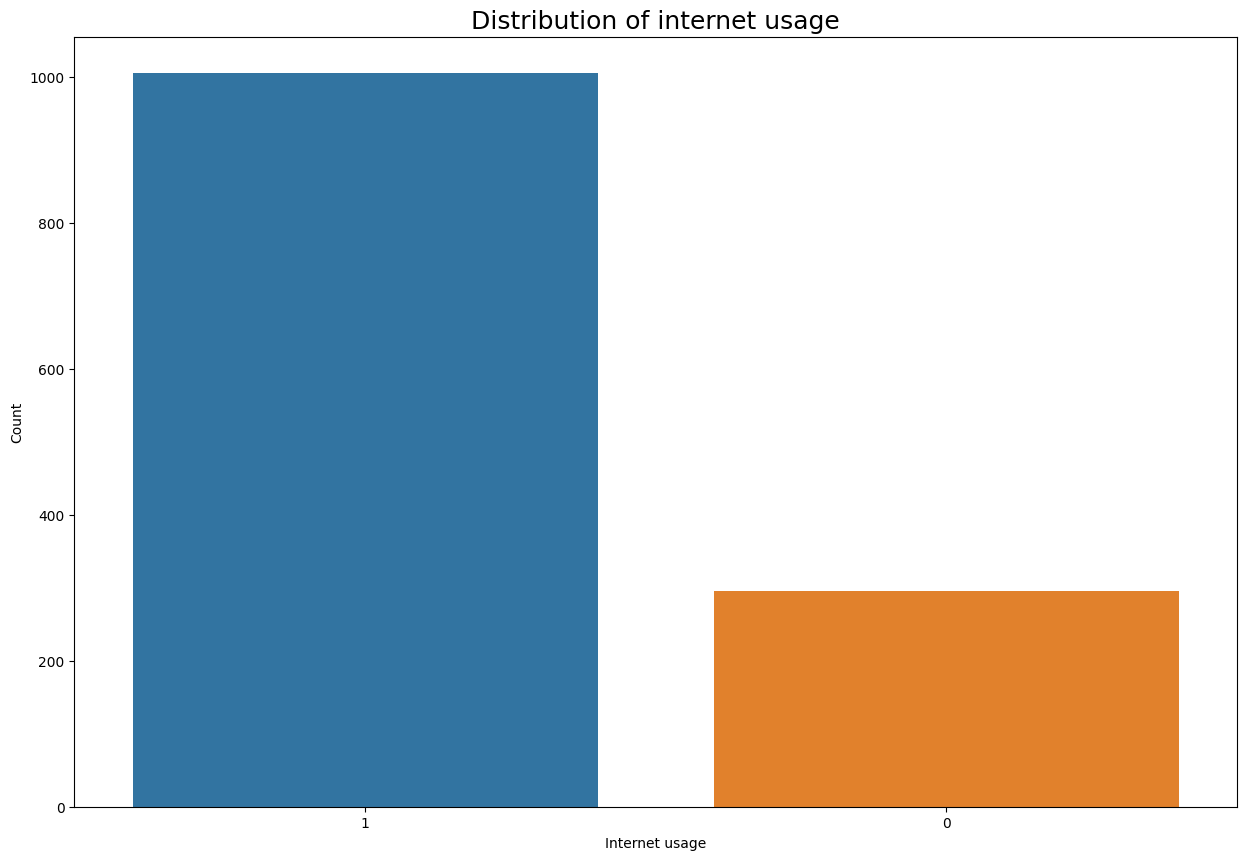

In [278]:
order = df1["internet_usage"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,x='internet_usage', order= order.index)
plt.title('Distribution of internet usage',fontsize=18)
plt.ylabel("Count")
plt.xlabel("Internet usage")
plt.show()

<Figure size 1500x1000 with 0 Axes>

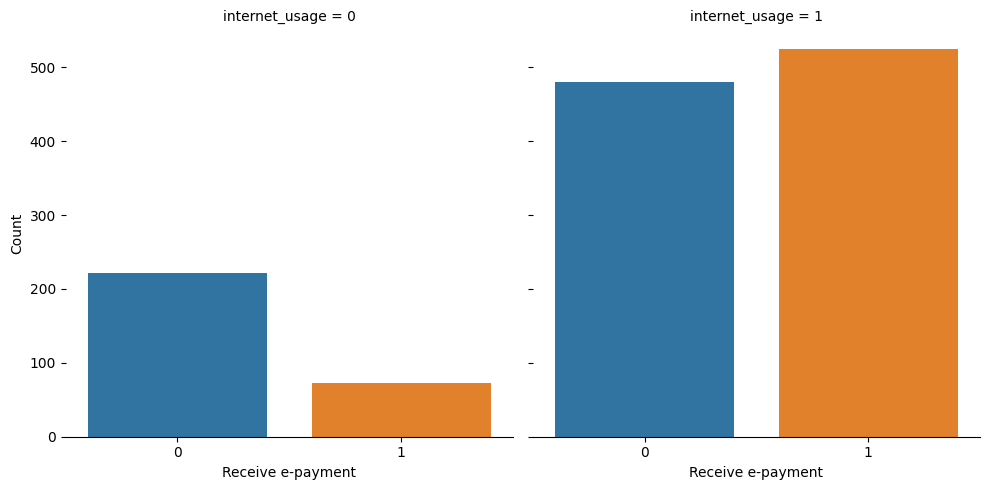

In [279]:
plt.figure(figsize=(15,10))
g = sns.catplot(
    data=df1, x="rec_epayment", col="internet_usage",
    kind="count",
)
g.set_axis_labels( "Receive e-payment","Count")
g.despine(left=True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

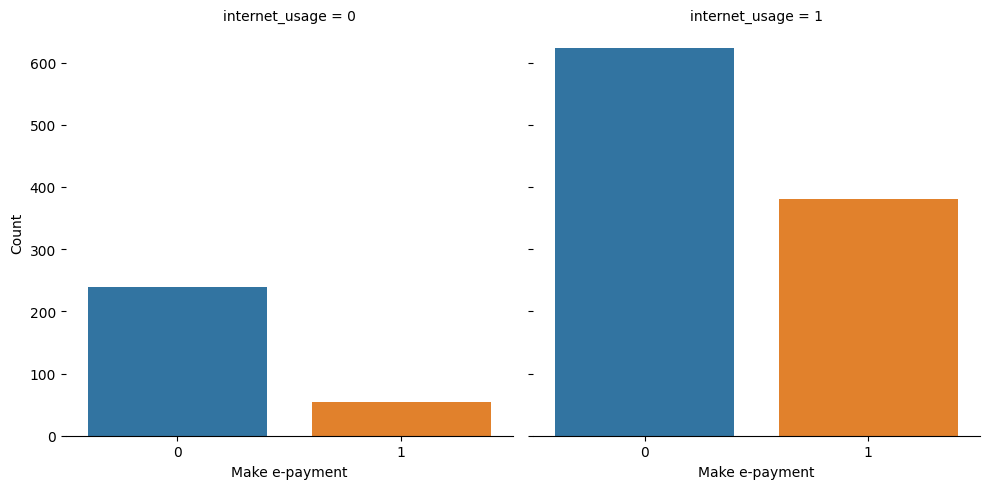

In [280]:
plt.figure(figsize=(15,10))
g = sns.catplot(
    data=df1, x="mak_epayment", col="internet_usage",
    kind="count",
)
g.set_axis_labels( "Make e-payment","Count")
g.despine(left=True)
plt.show()

A: 77.3 % of enterprises uses Internet and there dont seem to have an effect on the e-payment.

Q:What is the relation of using mobile money?

In [281]:
df1["PK27"].describe()

count     1300
unique       3
top         No
freq       963
Name: PK27, dtype: object

In [282]:
df1["PK27"].value_counts(normalize=True, dropna=False)*100

PK27
No                          74.076923
Yes                         25.692308
Don't know (spontaneous)     0.230769
Name: proportion, dtype: float64

In [283]:
# Create a new column for internet usage considering Dont know as no
df1["mobile_money_usage"]=[ 0 if (x=="Don't know (spontaneous)" or x=="No" ) else 1 for x in df1["PK27"] ] 

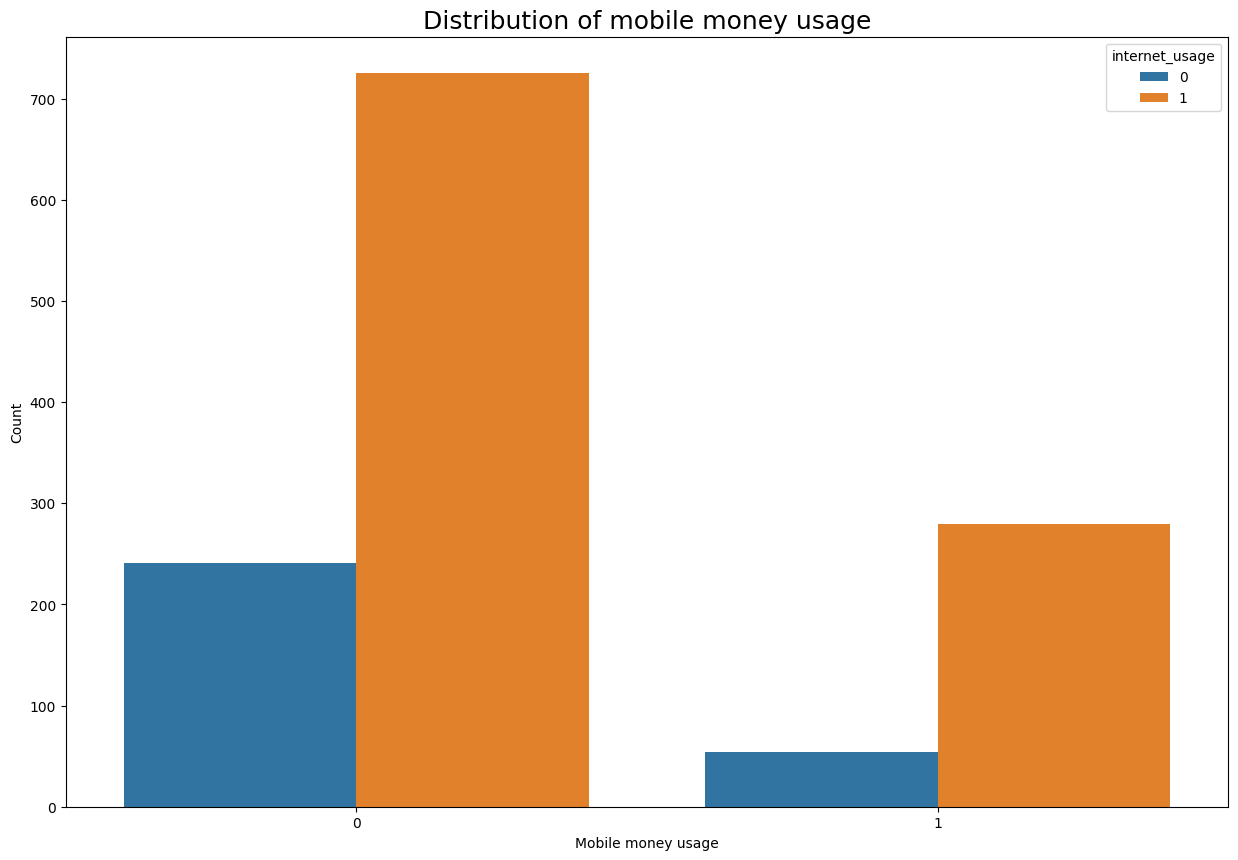

In [284]:
order = df1["mobile_money_usage"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,x='mobile_money_usage', hue='internet_usage',order= order.index)
plt.title('Distribution of mobile money usage',fontsize=18)
plt.ylabel("Count")
plt.xlabel("Mobile money usage")
plt.show()

Nothing suggest a relation between the two internet usage and mobile usage.

**What we can conclude:**
* **54.0%** of enterprises **receive e-payments** and **66.5%** of enterprises **make e-payments** (considering every answer as Don't know as No)
* The majority of firms who use epayment do make and receive payment however not all since the answers show that 189 enterprises make e-payment but dont receive vs 27 who receive and dont make.
* Out of the firms reported receiving e-payments 56.4% state having received Payment in less than a day
* Rank of popularity of payment methods according to firm who reported making or receiving e-payments are:
  1. Internet and mobile banking, including direct debit transfer
  2. Other
  3. Debit cards
  4. Credit cards
  5. Mobile money
  6. E-money and e-wallet, excluding mobile money
* The data doesnt suggest that the cost of transaction to be the cause of not adopting e-payment since in one hand 46.2% of received transactions are free of charge while 47.6% cost 1% to 2% and in the other hand 53.3% of made transactions are free of charge while 35.8% cost 1% to 2%.

* Also, the delay of payment reception is not suggested to be a hinder to e-payment adoption since only 22% of firms which receive e-payments reported average delay more than 5 days.

* **77.3 %** of enterprises uses **Internet** but there dont seem to have an effect on the e-payment.
* **25.7 %** of enterprises uses **Mobile payments**

### **7. Finance - loan /credit line/overdraft:**
   * k162 - In Last FY, Did Establishment Apply For New Loans/Lines of Credit?
   * PKk17 - Main Reason For Not Applying For New Loans or New Lines of Credit - localized
   * k82 - Establishment Has A Line of Credit or Loan From A Financial Institution?
   * k15d - Outstanding Personal Loans Used To Finance Establishment'S Business Activities?
   * PK28 - Does the firm owe any debt to informal sources?
   * k7 - At This Time, Does This Establishment Have An Overdraft Facility?
   * k6 - Does This Establishment Have A Checking And\or Saving Account?

In [285]:
df1["k162"].describe()

count     1300
unique       5
top         No
freq      1238
Name: k162, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


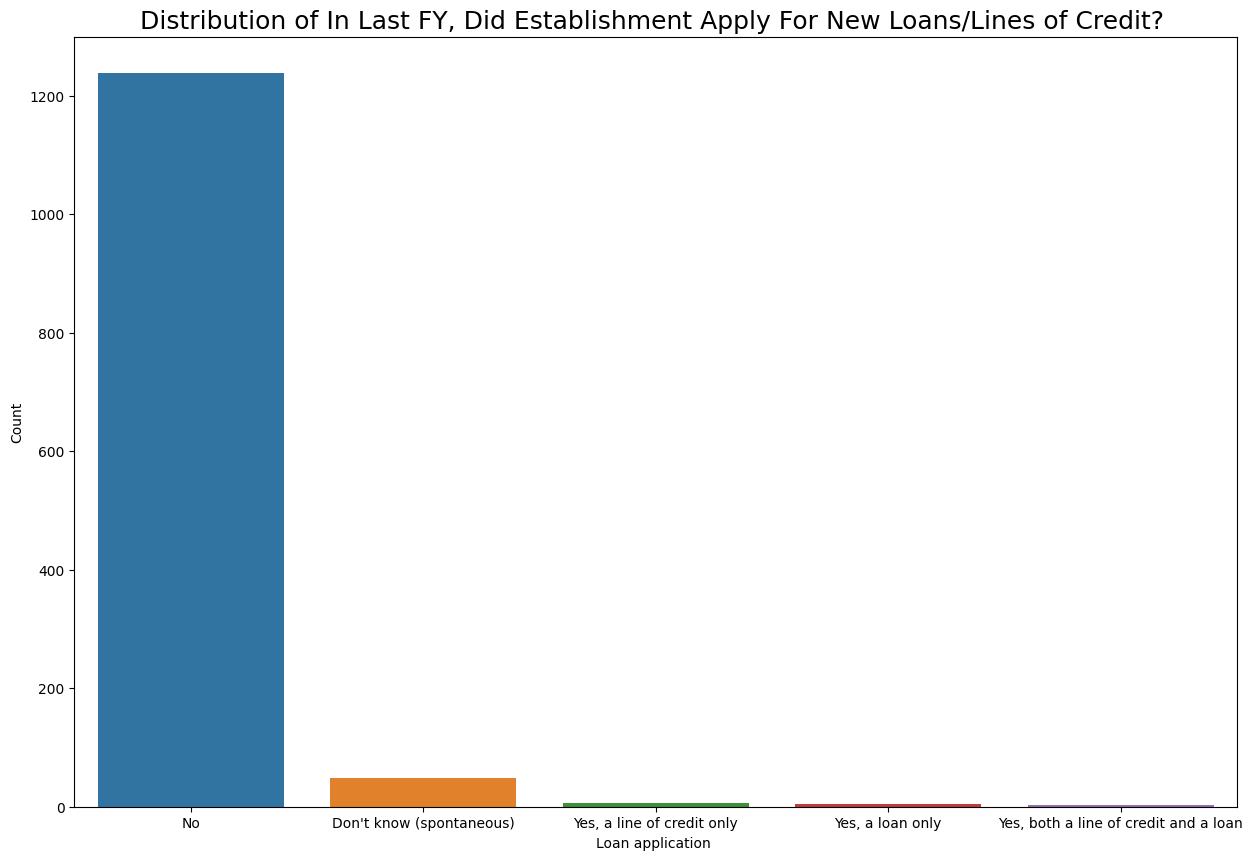

In [286]:
order = df1["k162"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,x='k162',order= order.index)
plt.title('Distribution of In Last FY, Did Establishment Apply For New Loans/Lines of Credit? ',fontsize=18)
plt.ylabel("Count")
plt.xlabel("Loan application ")
plt.show()

In [287]:
df1["PKk17"].describe()

count                                                  1238
unique                                                    9
top       No need for a loan - establishment had enough ...
freq                                                    587
Name: PKk17, dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


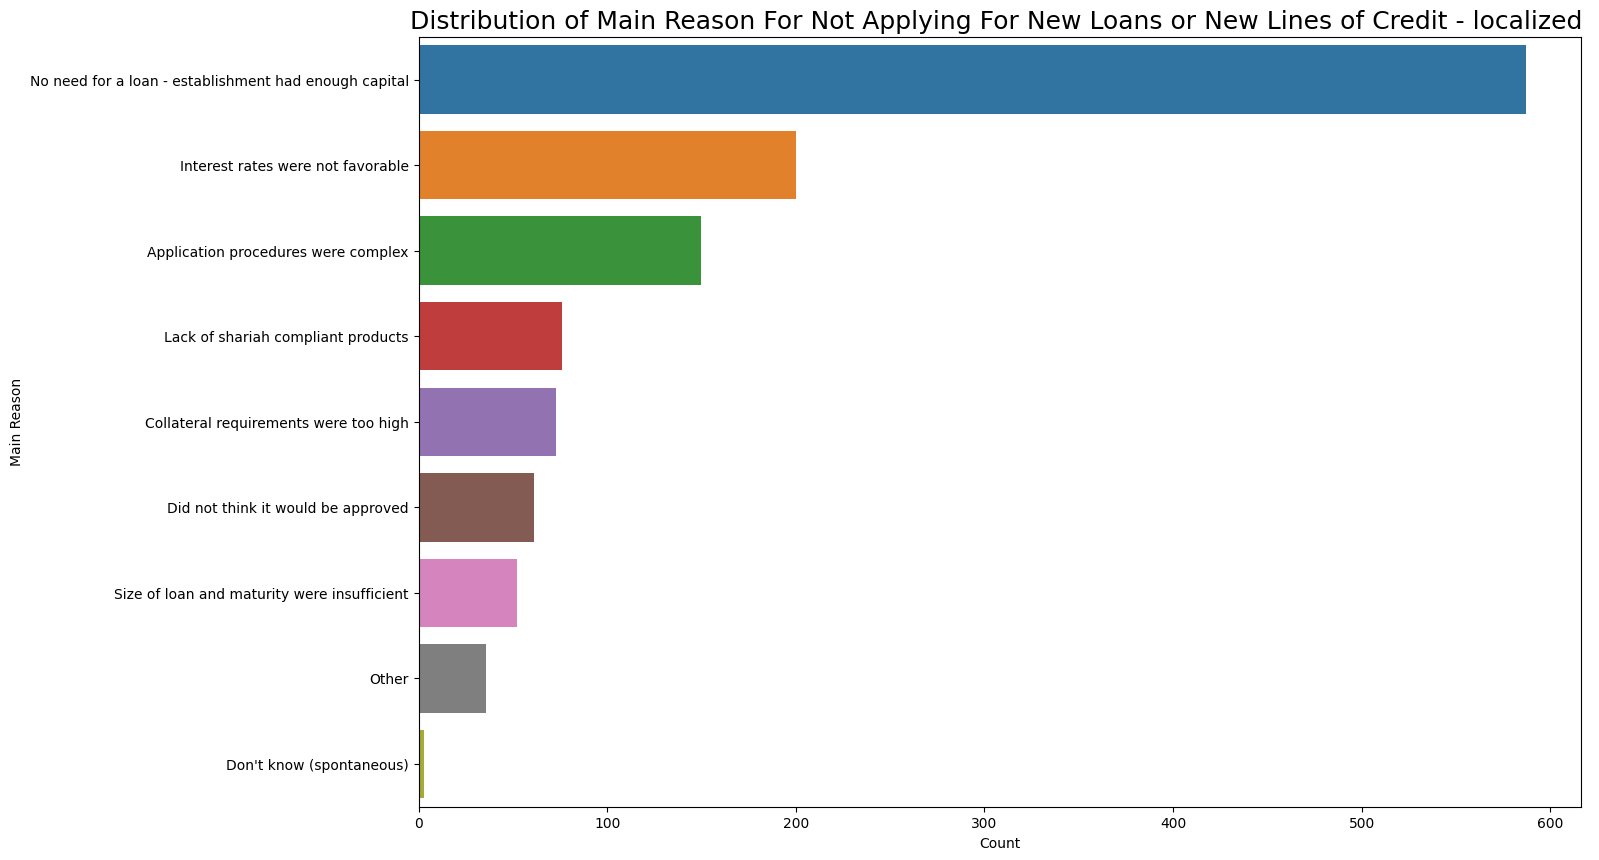

In [288]:
order = df1["PKk17"].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(df1,y='PKk17',order= order.index)
plt.title('Distribution of Main Reason For Not Applying For New Loans or New Lines of Credit - localized ',fontsize=18)
plt.ylabel("Main Reason")
plt.xlabel("Count")
plt.show()

In [289]:
df1["PKk17"].value_counts(dropna=False)

PKk17
No need for a loan - establishment had enough capital    587
Interest rates were not favorable                        200
Application procedures were complex                      150
Lack of shariah compliant products                        76
Collateral requirements were too high                     73
NaN                                                       62
Did not think it would be approved                        61
Size of loan and maturity were insufficient               52
Other                                                     36
Don't know (spontaneous)                                   3
Name: count, dtype: int64

In [290]:
#Check why this answer was not filled by checking values of K162
df1[df1["PKk17"].isna()][["k162","PKk17"]]

,k162,PKk17
19,Don't know (spontaneous),NaN
37,Don't know (spontaneous),NaN
58,Don't know (spontaneous),NaN
171,Don't know (spontaneous),NaN
183,Don't know (spontaneous),NaN
194,Don't know (spontaneous),NaN
196,Don't know (spontaneous),NaN
274,Don't know (spontaneous),NaN
277,"Yes, both a line of credit and a loan",NaN
323,"Yes, a line of credit only",NaN


In [291]:
# If K162 = dont know then PKk17 become dont know, other than that creat new category called credit requested
df1['PKk17'] = df1['PKk17'].cat.add_categories(["Credit Requested"])
df1.loc[(df1['k162'] == "Don't know (spontaneous)"), 'PKk17'] = "Don't know (spontaneous)"
df1.loc[((df1['k162'] != "No")& (df1['k162'] != "Don't know (spontaneous)")), 'PKk17'] = "Credit Requested"

In [292]:
df1["PKk17"].value_counts(dropna=False,normalize=True)*100

PKk17
No need for a loan - establishment had enough capital    45.153846
Interest rates were not favorable                        15.384615
Application procedures were complex                      11.538462
Lack of shariah compliant products                        5.846154
Collateral requirements were too high                     5.615385
Did not think it would be approved                        4.692308
Size of loan and maturity were insufficient               4.000000
Don't know (spontaneous)                                  3.923077
Other                                                     2.769231
Credit Requested                                          1.076923
Name: proportion, dtype: float64

The weight of each reason among those who dont have enough capital.

In [293]:
df1[(df1["PKk17"]!= "No need for a loan - establishment had enough capital")& (df1["PKk17"]!= "Don't know (spontaneous)")]["PKk17"].value_counts(dropna=False,normalize=True)*100

PKk17
Interest rates were not favorable                        30.211480
Application procedures were complex                      22.658610
Lack of shariah compliant products                       11.480363
Collateral requirements were too high                    11.027190
Did not think it would be approved                        9.214502
Size of loan and maturity were insufficient               7.854985
Other                                                     5.438066
Credit Requested                                          2.114804
Don't know (spontaneous)                                  0.000000
No need for a loan - establishment had enough capital     0.000000
Name: proportion, dtype: float64

Establishment Has A Line of Credit or Loan From A Financial Institution?

In [294]:
df1["k82"].value_counts(dropna=False)

k82
No                                       1252
Don't know (spontaneous)                   24
Yes, a loan only                           14
Yes, a line of credit only                  5
Yes, both a line of credit and a loan       5
Name: count, dtype: int64

Outstanding Personal Loans Used To Finance Establishment'S Business Activities? 

In [295]:
df1["k15d"].value_counts(dropna=False,normalize=True)*100

k15d
No                          94.000000
Don't know (spontaneous)     3.692308
Yes                          2.307692
Name: proportion, dtype: float64

Does the firm owe any debt to informal sources? 

In [296]:
df1["PK28"].value_counts(dropna=False,normalize=True)*100

PK28
No                          95.153846
Yes                          2.538462
Don't know (spontaneous)     2.307692
Name: proportion, dtype: float64

At This Time, Does This Establishment Have An Overdraft Facility?

In [297]:
df1["k7"].value_counts(dropna=False,normalize=True)*100

k7
No                          56.615385
Yes                         41.615385
Don't know (spontaneous)     1.769231
Name: proportion, dtype: float64

Create a new feature combining loan, credit line and overdrafting

In [298]:
df1['access_formal_financing'] = df1.apply(
    lambda row: int(
        row['k7'] == "Yes" or
        row['k82'] == "Yes" or
        row['k162'] in [
            "Yes, a loan only",
            "Yes, a line of credit only",
            "Yes, both a line of credit and a loan"
        ]
    ), axis=1
)

In [299]:
df1['access_formal_financing'].value_counts(dropna=False)

access_formal_financing
0    757
1    543
Name: count, dtype: int64

In [300]:
# Validate the results
df1[['access_formal_financing','k7','k82','k162']].head(20)

,access_formal_financing,k7,k82,k162
0,1,Yes,No,No
1,1,Yes,No,No
2,1,Yes,No,No
3,0,No,No,No
4,0,Don't know (spontaneous),No,No
5,1,Yes,No,No
6,1,Yes,No,No
7,1,Yes,No,No
8,0,No,No,No
9,0,No,No,No


Check the accessibility to formal finance by region and by industry.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


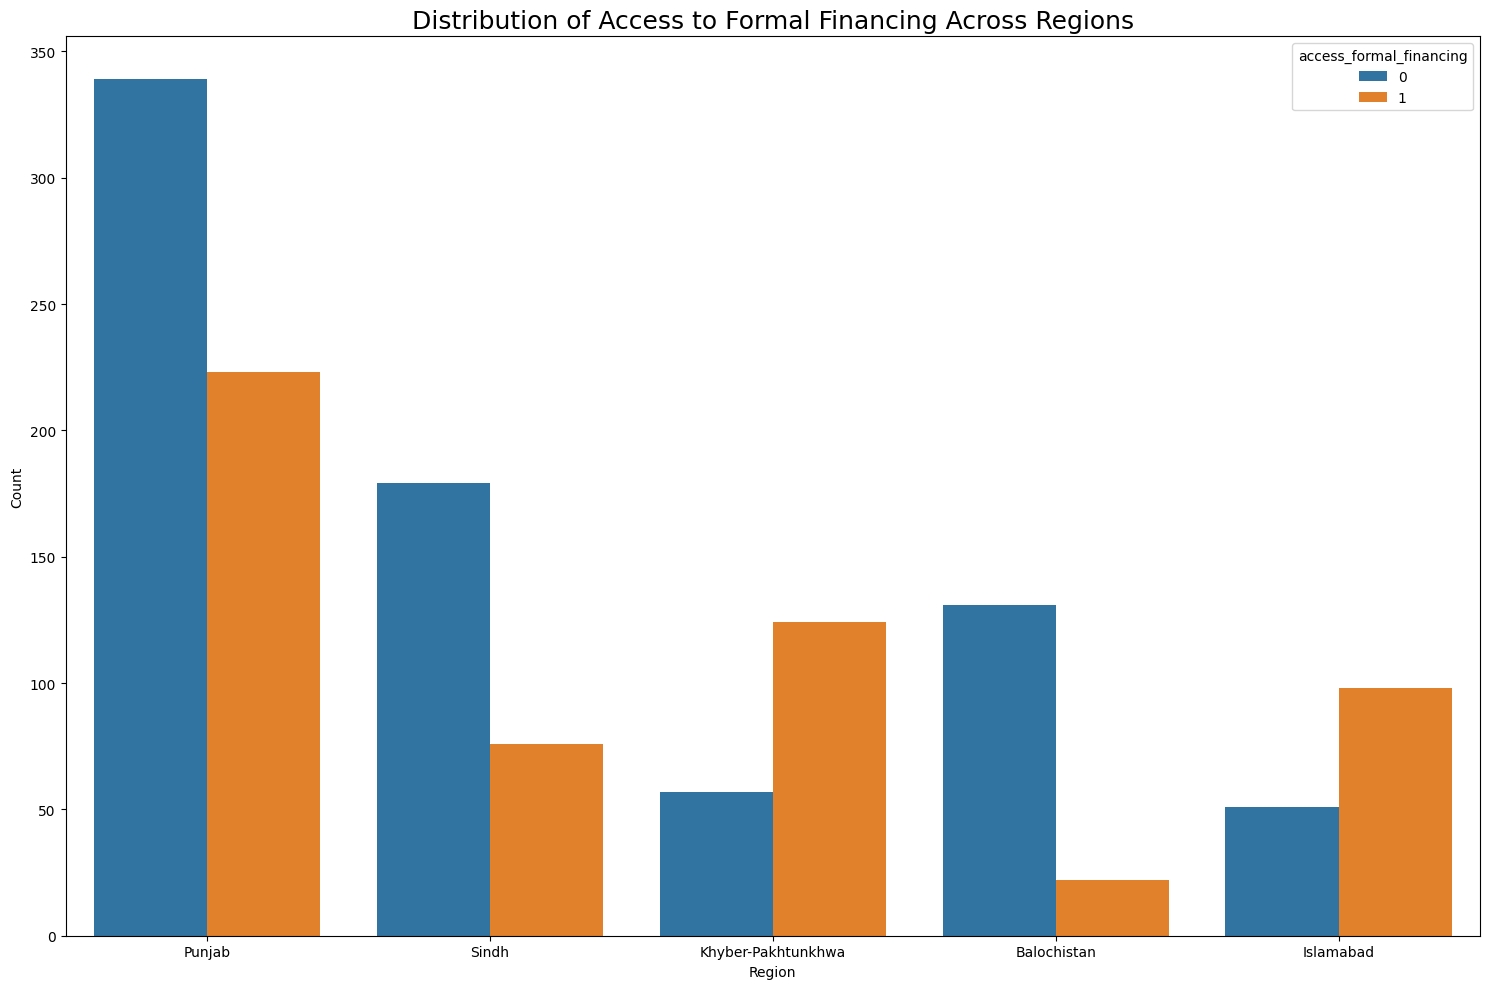

In [301]:
# Plot the countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df1, x='a3a', hue='access_formal_financing')
plt.title('Distribution of Access to Formal Financing Across Regions', fontsize=18)
plt.ylabel("Count")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


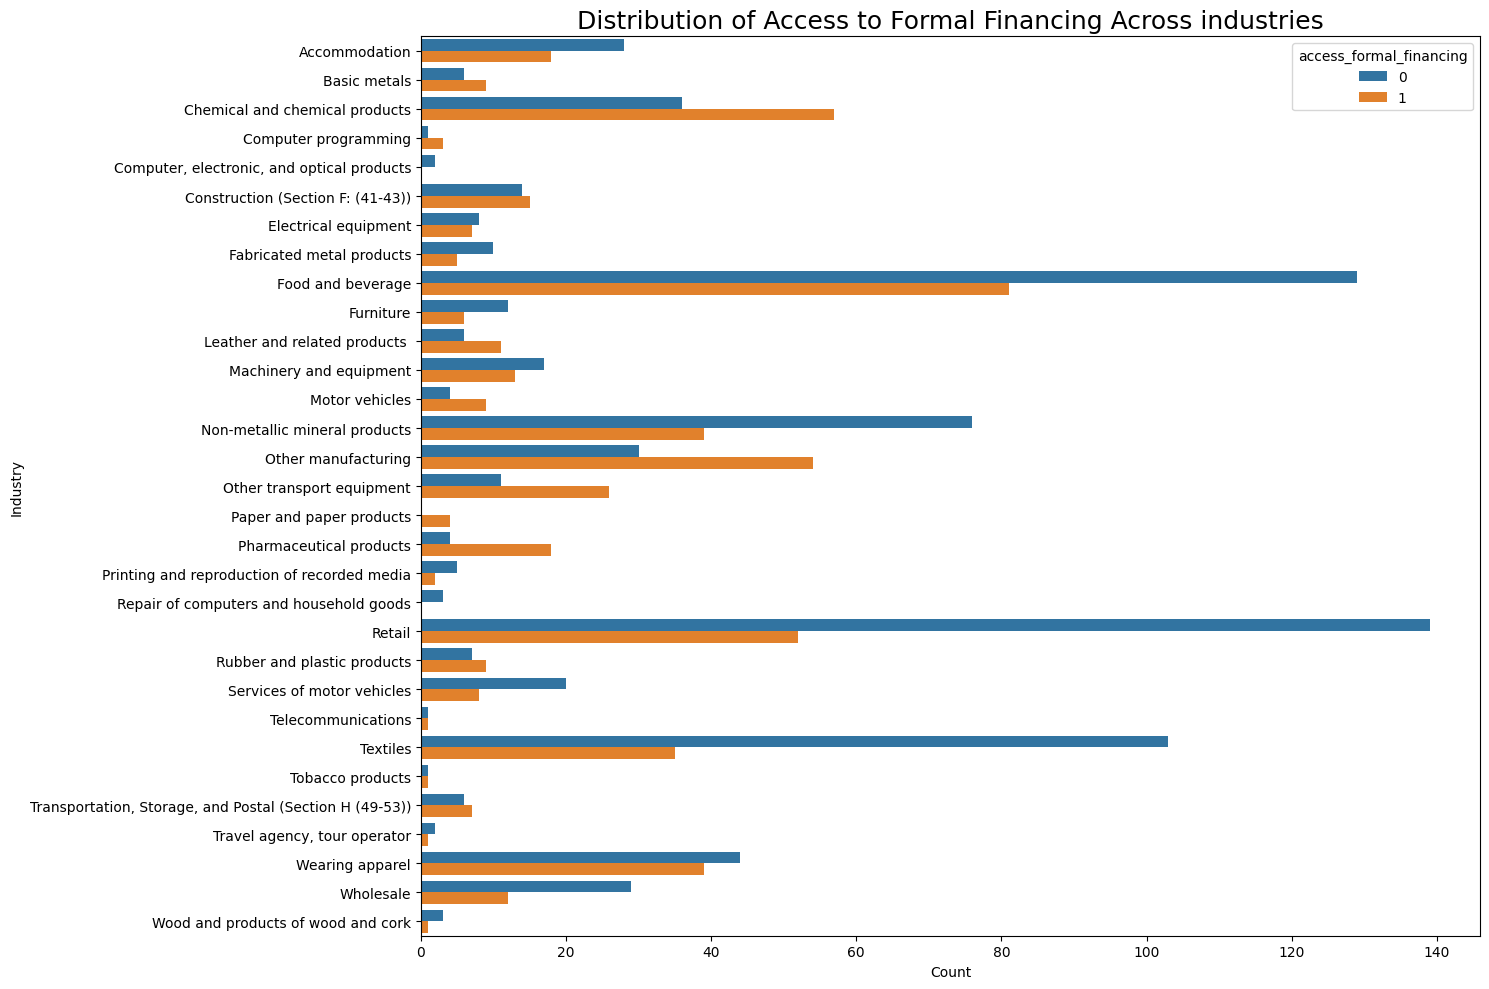

In [302]:
# Plot the countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df1, y='a4b_v4', hue='access_formal_financing')
plt.title('Distribution of Access to Formal Financing Across industries', fontsize=18)
plt.ylabel("Industry")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

Does This Establishment Have A Checking And\or Saving Account? 

In [303]:
df1['k6'].value_counts(dropna=False)

k6
Yes                         1181
No                           116
Don't know (spontaneous)       3
Name: count, dtype: int64

In [304]:
df1['has_account'] = df1.apply(
    lambda row: int(
        row['k6'] == "Yes"
    ), axis=1
)

df1['has_account'].value_counts()

has_account
1    1181
0     119
Name: count, dtype: int64

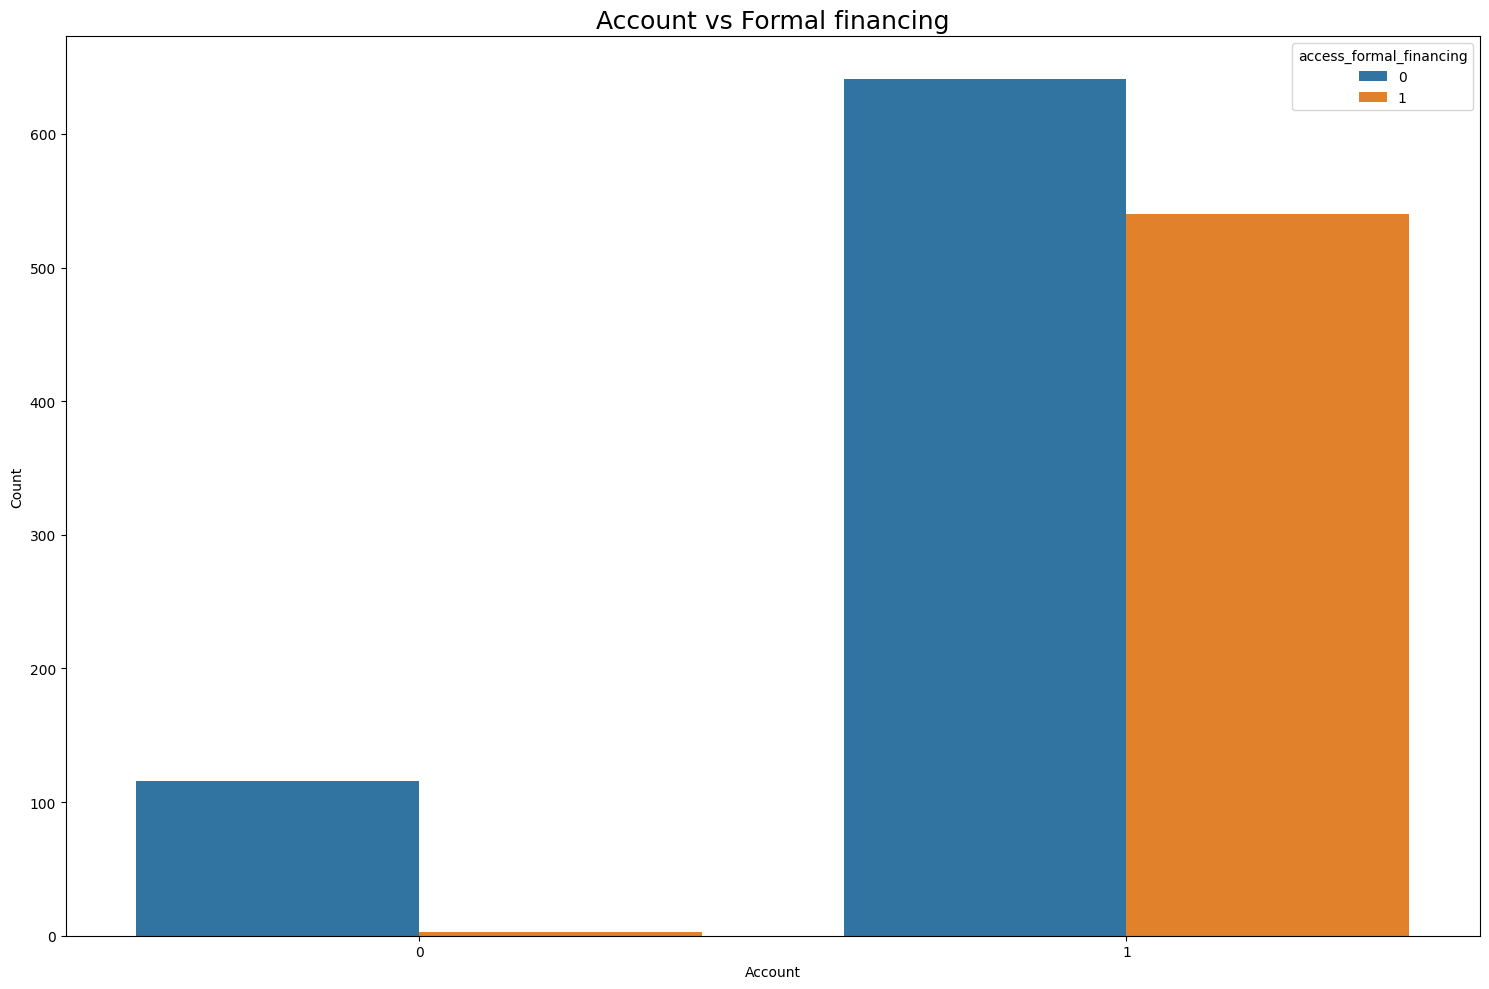

In [305]:
# Plot the countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df1, x='has_account', hue='access_formal_financing')
plt.title('Account vs Formal financing', fontsize=18)
plt.ylabel("Count")
plt.xlabel("Account")
plt.tight_layout()
plt.show()

The plot shows some enterprises not having bank account but still have access to official finance.I need to understand how!

In [306]:
no_account_finance_df = df1[(df1['has_account'] == 0) & (df1['access_formal_financing'] == 1)]
no_account_finance_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata,finance_obstacle,payment_avg_rec_days,rec_epayment,mak_epayment,internet_usage,mobile_money_usage,access_formal_financing,has_account
433,Medium,Panel,Pharmaceutical products,Manufacturing,Islamabad,90,Medium,1,8,2022,11,25,90,Urdu,Establishment,0,1,Yes,Yes,90.0,No,NaN,NaN,Yes,2021,12,31,Partnership,80,Yes,100,0,0,0,No,NaN,2009,90,2013,8,No,No,No,NaN,NaN,NaN,2800,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,1500,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,No,NaN,NaN,NaN,NaN,With some difficulty,Minor obstacle,NaN,NaN,NaN,100,900000000.0,920000000.0,800000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor obstacle,Minor obstacle,No,NaN,Tend to agree,Tend to agree,We fixed it and took action to make sure it di...,No,NaN,No,NaN,NaN,NaN,No,NaN,Promotions were based partly on performance an...,After 6 months of identifying non-manager unde...,National â main product sold mostly across t...,Too many to count,NaN,25.0,No,"Government or government agencies, including s...",No,No,Yes,Yes,Yes,Yes,Foreign firms operating in Pakistan,They do not pay import duties or observe trade...,Criteria for licensing that puts certain types...,No,"Yes, there is more competition",Yes,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,100.0,72.0,Labor cost,Availability of land slot,100,0,No,NaN,NaN,No,NaN,NaN,NaN,NaN,Minor obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,Minor obstacle,Yes,100,0,0,0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,Application procedures were complex,Application procedures were co

These enterprises records shows inconsistency since despite that they answer No or Don't know to the detention of bank account they answered yes to having overdraft facility. So these record must be corrected.Use the dataset original columns to check if these records are all we have.

In [307]:
no_account_overdraft_df = df1[((df1['k6'] == "No")|(df1['k6'] == "Don't know (spontaneous)")) & (df1['k7'] == "Yes")]
no_account_overdraft_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata,finance_obstacle,payment_avg_rec_days,rec_epayment,mak_epayment,internet_usage,mobile_money_usage,access_formal_financing,has_account
433,Medium,Panel,Pharmaceutical products,Manufacturing,Islamabad,90,Medium,1,8,2022,11,25,90,Urdu,Establishment,0,1,Yes,Yes,90.0,No,NaN,NaN,Yes,2021,12,31,Partnership,80,Yes,100,0,0,0,No,NaN,2009,90,2013,8,No,No,No,NaN,NaN,NaN,2800,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN,Reduce electricity consumption,No,NaN,NaN,NaN,1500,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,No,NaN,NaN,NaN,NaN,With some difficulty,Minor obstacle,NaN,NaN,NaN,100,900000000.0,920000000.0,800000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor obstacle,Minor obstacle,No,NaN,Tend to agree,Tend to agree,We fixed it and took action to make sure it di...,No,NaN,No,NaN,NaN,NaN,No,NaN,Promotions were based partly on performance an...,After 6 months of identifying non-manager unde...,National â main product sold mostly across t...,Too many to count,NaN,25.0,No,"Government or government agencies, including s...",No,No,Yes,Yes,Yes,Yes,Foreign firms operating in Pakistan,They do not pay import duties or observe trade...,Criteria for licensing that puts certain types...,No,"Yes, there is more competition",Yes,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,100.0,72.0,Labor cost,Availability of land slot,100,0,No,NaN,NaN,No,NaN,NaN,NaN,NaN,Minor obstacle,No,NaN,Yes,Yes,2,NaN,NaN,No,NaN,NaN,Minor obstacle,Yes,100,0,0,0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,No,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,Application procedures were complex,Application procedures were co

Same records.

In [308]:
df1.loc[((df1['k6'] == "No")|(df1['k6'] == "Don't know (spontaneous)")) & (df1['k7'] == "Yes"),'k6'] ="Yes"
df1['has_account'] = df1.apply(
    lambda row: int(
        row['k6'] == "Yes" 
    ), axis=1
)

df1['has_account'].value_counts()

has_account
1    1184
0     116
Name: count, dtype: int64

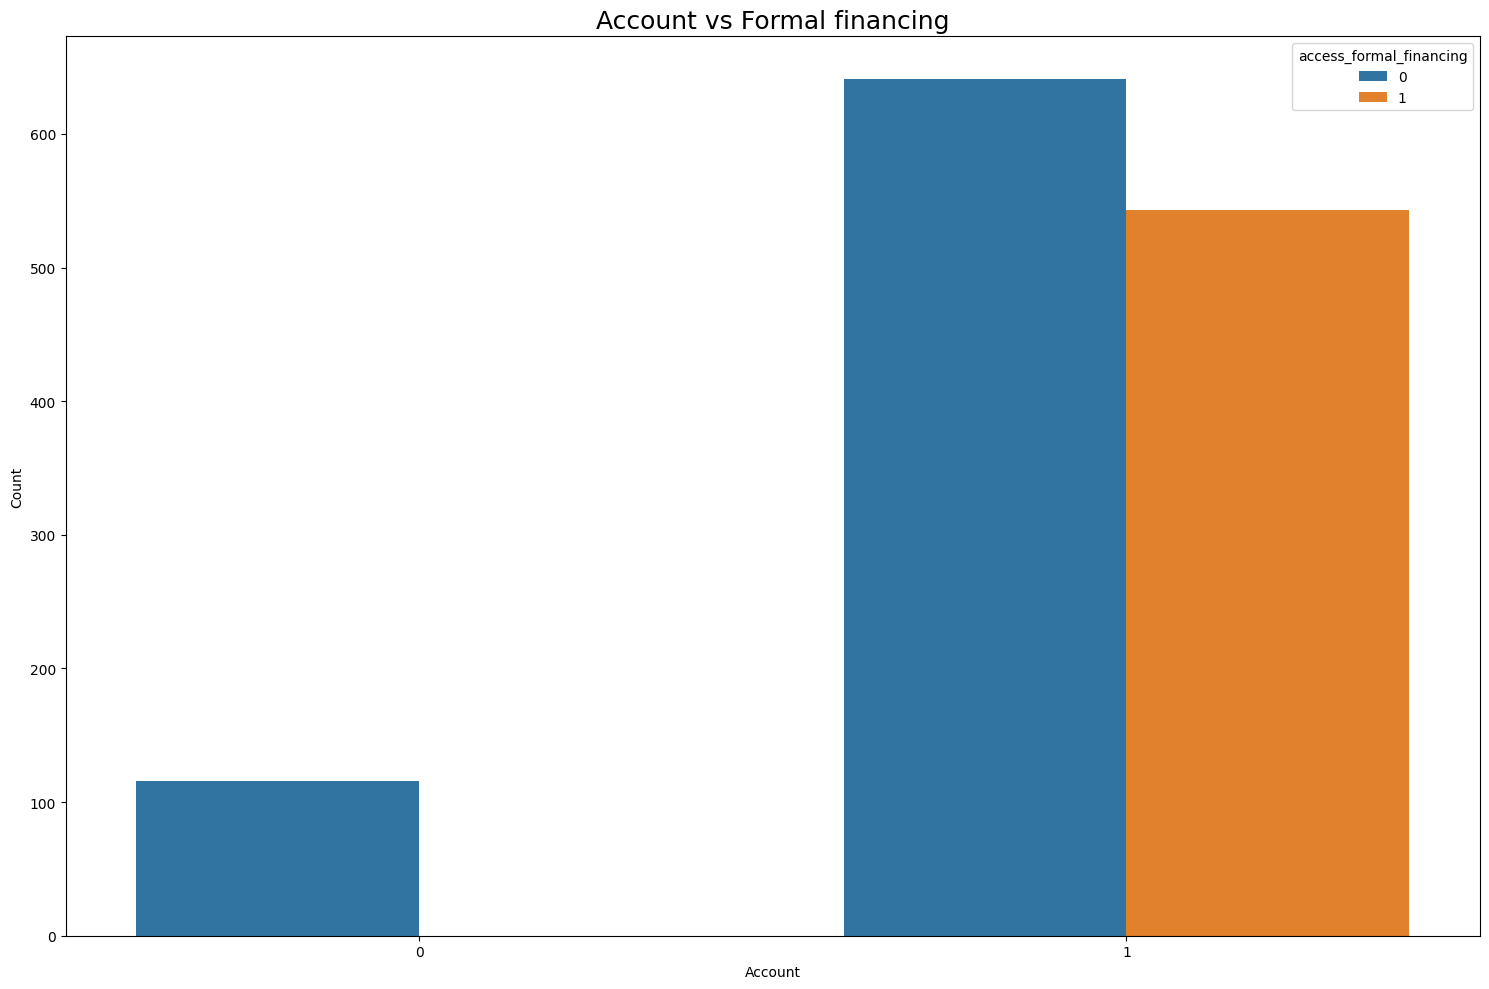

In [309]:
# Plot the countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df1, x='has_account', hue='access_formal_financing')
plt.title('Account vs Formal financing', fontsize=18)
plt.ylabel("Count")
plt.xlabel("Account")
plt.tight_layout()
plt.show()

In [310]:
no_account_df = df1[df1['has_account']==0]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


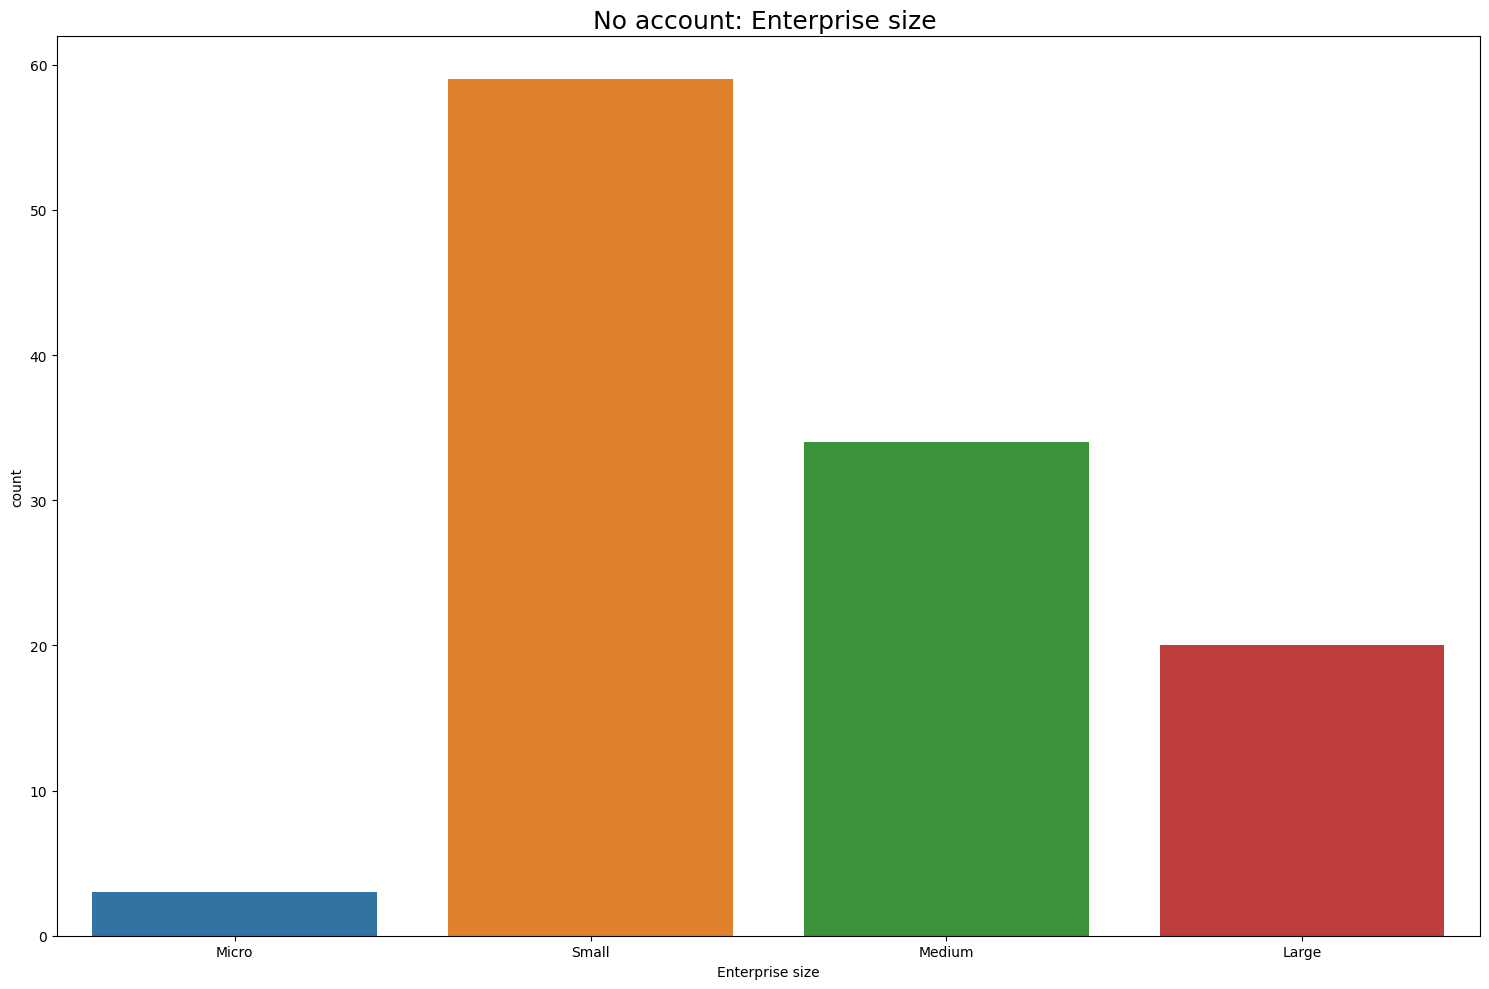

In [311]:
# Plot the countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=no_account_df, x='a6b')
plt.title('No account: Enterprise size ', fontsize=18)
plt.xlabel("Enterprise size")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [312]:
no_account_df[no_account_df['a6b']=="Large"]['a6c'].value_counts()

a6c
300     4
100     3
150     3
120     2
250     2
125     2
170     1
350     1
200     1
2010    1
Name: count, dtype: int64

In [313]:
no_account_df[no_account_df['a6c']==2010]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,a6a,panel,a4b_v4,a0,a3a,a6c,a6b,a14d,a14m,a14y,a14h,a14min,a1,a1a,a1c,competition_select,tax_select,vat_applicable,a7,a7a,a7b,a11,a7c,a9,a20y,a20m,a20d,b1,b3,b3a,b2a,b2b,b2c,b2d,b4,b4a,b5,b6,b6b,b7,b7a,b8,c3,c4,c5,c31,c32,c6,c7,c8a,c8b,c9a,c9b,c10,c11,PK1,PK2,PK3,PK4,PK5,c12,c13,c14,c33,c34,c34b,c15,c152,c16,c162,c17,c172,c35a,c35b,c22b,c36,c37,c38,c39,c40a,c40b,c41a,c41b,c42,c30a,d1a6a,d1a6b,d1a6c,d1a3,d2,d2a1,n3,d3a,d3b,d3c,d32,d4,d4a,d4b,d5a,PK6,PK7,d33a,d33b,d34,d35,d36a,d36b,d37,d8,d10,d11,PK8,d12a,d12b,d13,d39,d14a,d14b,d14,d15a,d40a,d40b,d41,PK9,d30a,d30b,o1,o2,o3a,o3b,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,e1,e2b,e31a,e31b,e6,PK10,PK11a,PK11b,PK11c,PK11d,PK11e,PK12,PK13,PK14,PK15,e11,e32,e33,e34,e35,e30,h1,h2,PK16,h5,PK17,PK18,PK19,PK20,PK21,PK22,PK23,PK24a,PK24b,PK24c,PK24d,PK24e,PK24f,PK24g,PK24h,PK24i,PK24j,PK24k,h8,h9,PK25,f1,f2,PK26a,PK26b,g6a,g1a,g2,g3,g4,g31,g32,g33,g5a,g5b,g30a,ge3,ge3a,ge7,ge8d,i1,i2a,i2b,i3,i4a,i4b,i30,PK27,k3a,k3bc,k3e,k3f,k3hd,k4,n5a,n5b,k5a,k5a1,k5i,k5i1,k5bc,k5bc1,k5e,k5e1,k5f,k5f1,k5hdj,k5hdj1,k4b,n5c,n5d,k6,k7,k82,k9,k10,k11,k13,k14a,k14b,k14c,k14d,k14e,k15a,k15b,k15c,PK28,PK29,k15d,k162,k17,PKk17,k20a1,k31,k32,k21,k33,k34,k35,k36,k37,k38,k39,k40,k30,h7a,j31,PK30a,PK30b,PK30c,j2,PK31a,PK31b,PK32,j3,j4,j5,j32,j33,j34,j35a,j35b,j36,j37,j38,j39,j40,j6a,j6,j41,j42,j43,j7a,j7b,j10,j11,j12,j13,j14,j15,j30a,j30b,j30c,j30e,j30f,h30,j30_taxrate_pos,j30_taxadmin_pos,j30_permit_pos,j30_instability_pos,j30_corruption_pos,j30_courts_pos,PK33,PK34,l1,l2,l3a,l3b,l4a1,l4a2,l4b,l5a,l5b,l5,l9b,l9b1,l10,l11a,l11a1,l11b,l11b1,l12a,l12a1,l31,l32,l33,l34,l35,l36,l1a,l6,l6a,l8,l37,l38,l39,l40,l41,l30a,l30b,SARl31,m1a,m1a_finance_pos,m1a_land_pos,m1a_permit_pos,m1a_corruption_pos,m1a_courts_pos,m1a_crime_pos,m1a_trade_pos,m1a_electricity_pos,m1a_workforce_pos,m1a_labor_pos,m1a_instability_pos,m1a_informal_pos,m1a_taxadmin_pos,m1a_taxrate_pos,m1a_transport_pos,n2a,n2a2,n2b,n2k,n2l,n2e,n2i,n2a1,n2b1,n2e1,n7a,n11,n12,a15d,a15m,a15y,a15h,a15min,a16,a17,a18,a19h,a19m,a13,a3b,a3c,a3,d1a2_v4,d1a2,a4b,ic1,stratificationregioncode,stratificationsizecode,stratificationsectorcode,stratificationpanelcode,wstrict,wmedian,wweak,strata,finance_obstacle,payment_avg_rec_days,rec_epayment,mak_epayment,internet_usage,mobile_money_usage,access_formal_financing,has_account
1083,Medium,Fresh,Non-metallic mineral products,Manufacturing,Punjab,2010,Large,21,10,2022,12,15,90,Urdu,Establishment,0,1,Yes,Yes,2.0,Yes,No,Yes,NaN,2021,6,30,Sole proprietorship,100,Yes,100,0,0,0,No,NaN,2010,13,2010,7,No,No,No,NaN,NaN,NaN,500,Yes,13.0,1.0,30.0,NaN,300000.0,No,NaN,NaN,Yes,10.0,500000.0,Invest in alternate sources of electricity,No,NaN,NaN,NaN,1800,Gallons,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,The establishment does not have an internet co...,NaN,NaN,NaN,NaN,With some difficulty,Major obstacle,NaN,NaN,NaN,100,20000000.0,15000000.0,11000000.0,100,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.0,High trade costs,100,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very severe obstacle,Minor obstacle,Yes,No,Tend to agree,Tend to agree,We fixed it and took action to make sure it di...,Yes,3-9 production performance indicators,Yes,Combination of short term and long term produc...,Possible to achieve without much effort,Only senior managers,No,NaN,Promotions were based solely on performance an...,After 6 months of identifying non-manager unde...,Local â main product sold mostly in same mun...,18.0,NaN,30.0,No,"Small or medium private firms, excluding this ...",No,No,No,No,No,No,Domestic private firms operating in the same p...,They do not pay import duties or observe trade...,Criteria for licensing that puts certain types...,Yes,"Yes, there is more competition",Prices are regulated,No,NaN,Minor obstacle,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,100.0,72.0,Cost of land / buildings,Availability of main inputs,100,100,No,NaN,NaN,No,NaN,NaN,NaN,NaN,Very severe obstacle,No,NaN,No,Ye

In [314]:
df.iloc[1083]	

idstd                                                                 1013132
id                                                                      33454
a4a                                             Non-Metallic Mineral Products
a6a                                                                    Medium
a2                                                                     Punjab
panel                                                                   Fresh
a4b_v4                                          Non-metallic mineral products
a0                                                              Manufacturing
a3a                                                                    Punjab
a6c                                                                      2010
a6b                                                                     Large
a14d                                                                       21
a14m                                                            

In [315]:
#check the relationship between a6B,a6a and a6c
df.groupby(['a6b', 'a6a'])['a6c'].agg(['min', 'mean', 'max'])

<ipython-input-315-e99a9f14cbb2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['a6b', 'a6a'])['a6c'].agg(['min', 'mean', 'max'])
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


min        mean     max
a6b    a6a                              
Micro  Small     2.0    3.285714     4.0
       Medium    3.0    3.000000     3.0
       Large     NaN         NaN     NaN
Small  Small     5.0   10.095238    19.0
       Medium    5.0    9.378641    18.0
       Large     5.0    9.294118    18.0
Medium Small    20.0   34.914530    80.0
       Medium   20.0   47.311864    95.0
       Large    20.0   51.395062    95.0
Large  Small   100.0  314.230769  1840.0
       Medium  100.0  244.782609  3000.0
       Large   100.0  410.735849  5500.0

In [316]:
no_account_df['a6c'].describe()

count     116.000000
mean       65.491379
std       196.755487
min         3.000000
25%         7.000000
50%        15.000000
75%        60.000000
max      2010.000000
Name: a6c, dtype: float64

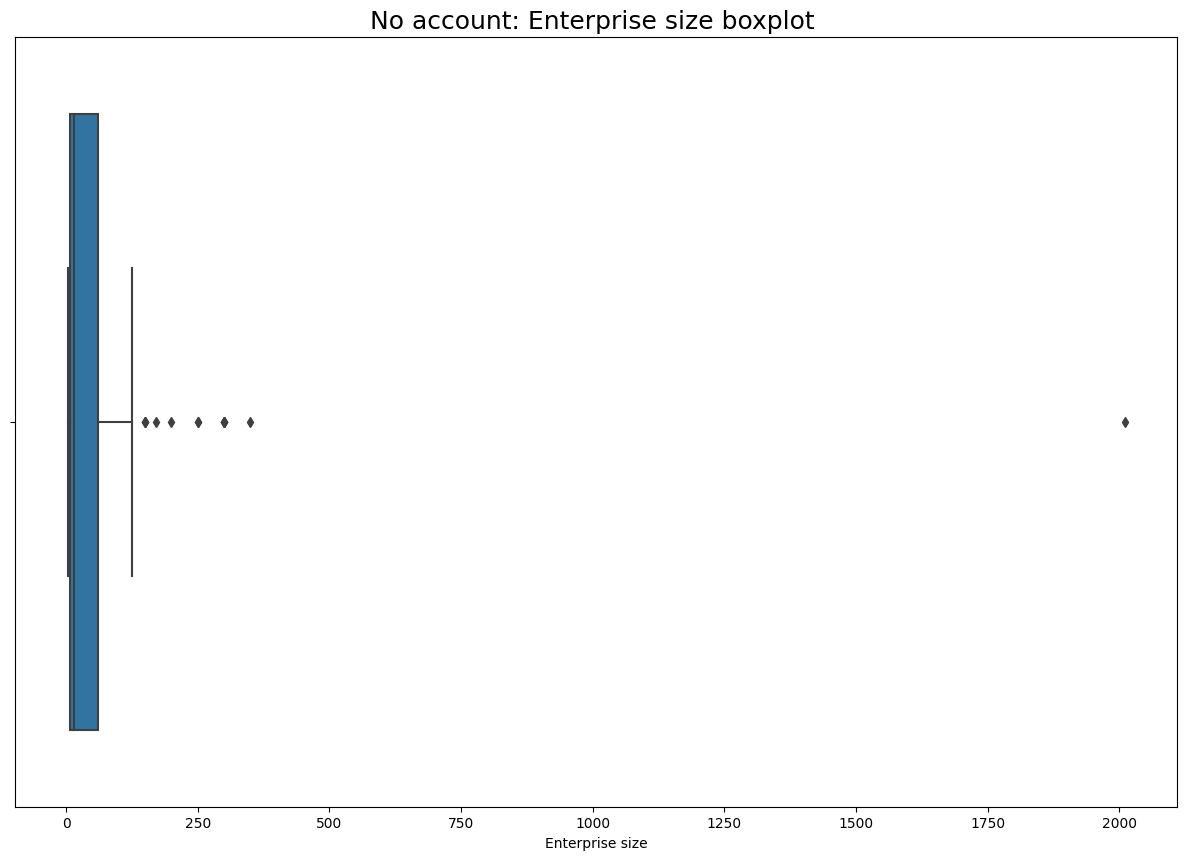

In [317]:
# Plot the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=no_account_df, x='a6c')
plt.title('No account: Enterprise size boxplot ', fontsize=18)
plt.xlabel("Enterprise size")
plt.show()

In [ ]:
#consistency check on head count 
consistency_head_count_df =  df[['b6','a6c','b5']]
#consistency_head_count_df['years_in_business'] = 2022 - pd.intdf['b5']
#consistency_head_count_df['rate_of_growth'] = (consistency_head_count_df['a6c'] - consistency_head_count_df['b6'])/consistency_head_count_df['years_in_business'] 
#consistency_head_count_df.head()